In [1]:
# Importing the necessarily libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Reading the dataset
filename = '956ee8b0-72d9-4780-8585-6ea958110c75_Data.csv'
df = pd.read_csv(filename)
df.head()


,Country Name,Country Code,Series Name,Series Code,2022 [YR2022],2021 [YR2021],2020 [YR2020],2019 [YR2019],2018 [YR2018],2017 [YR2017],...,1983 [YR1983],1982 [YR1982],1981 [YR1981],1980 [YR1980],1979 [YR1979],1978 [YR1978],1977 [YR1977],1976 [YR1976],1975 [YR1975],2023 [YR2023]
0,Singapore,SGP,"Population, total",SP.POP.TOTL,5637022,5453566,5685807,5703569,5638676,5612253,...,2681061,2646466,2532835,2413945,2383500,2353600,2325300,2293300,2262600,5917648
1,Singapore,SGP,Population growth (annual %),SP.POP.GROW,3.30862052439523,-4.17033630017526,-0.311904961250833,1.14428330688929,0.469704298714121,0.0885954699924263,...,1.29874466224405,4.38859363289509,4.80768900934127,1.26923429916508,1.26239247977074,1.20970078915976,1.38572346856491,1.347723377756,1.46026991588953,4.85831607781442
2,Singapore,SGP,Surface area (sq. km),AG.SRF.TOTL.K2,728,728,728,726,724,722,...,680,680,680,680,680,680,680,680,680,..
3,Singapore,SGP,Population density (people per sq. km of land ...,EN.POP.DNST,7851.00557103064,7595.49582172702,7918.95125348189,7965.87849162011,7897.30532212885,7882.37780898876,...,4001.58358208955,3949.94925373134,3780.35074626866,3602.90298507463,3557.46268656716,3512.83582089552,3470.59701492537,3422.83582089552,3377.01492537313,..
4,Singapore,SGP,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [3]:
# Removing the YR strings from the names of the columns to make for better analysis
df.columns = df.columns.str.replace(r"\s*\[.*\]", "", regex=True)
df.columns


Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', '2022',
       '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986',
       '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977',
       '1976', '1975', '2023'],
      dtype='object')

In [4]:
# Converting all the columns to numeric values
numeric_cols = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986',
       '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977',
       '1976', '1975', '2023']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  158 non-null    object 
 1   Country Code  156 non-null    object 
 2   Series Name   156 non-null    object 
 3   Series Code   156 non-null    object 
 4   2022          118 non-null    float64
 5   2021          130 non-null    float64
 6   2020          131 non-null    float64
 7   2019          130 non-null    float64
 8   2018          129 non-null    float64
 9   2017          130 non-null    float64
 10  2016          134 non-null    float64
 11  2015          133 non-null    float64
 12  2014          131 non-null    float64
 13  2013          126 non-null    float64
 14  2012          123 non-null    float64
 15  2011          123 non-null    float64
 16  2010          125 non-null    float64
 17  2009          125 non-null    float64
 18  2008          126 non-null    

In [5]:
# Separating the dataframe into 3 by 'Country Name
df_singapore = df[df['Country Name'] == 'Singapore']
df_kenya = df[df['Country Name'] == 'Kenya']
df_china = df[df['Country Name'] == 'China']



In [6]:
df_singapore.head()

,Country Name,Country Code,Series Name,Series Code,2022,2021,2020,2019,2018,2017,...,1983,1982,1981,1980,1979,1978,1977,1976,1975,2023
0,Singapore,SGP,"Population, total",SP.POP.TOTL,5.637022e+06,5.453566e+06,5.685807e+06,5.703569e+06,5.638676e+06,5.612253e+06,...,2.681061e+06,2.646466e+06,2.532835e+06,2.413945e+06,2.383500e+06,2.353600e+06,2.325300e+06,2.293300e+06,2.262600e+06,5.917648e+06
1,Singapore,SGP,Population growth (annual %),SP.POP.GROW,3.308621e+00,-4.170336e+00,-3.119050e-01,1.144283e+00,4.697043e-01,8.859547e-02,...,1.298745e+00,4.388594e+00,4.807689e+00,1.269234e+00,1.262392e+00,1.209701e+00,1.385723e+00,1.347723e+00,1.460270e+00,4.858316e+00
2,Singapore,SGP,Surface area (sq. km),AG.SRF.TOTL.K2,7.280000e+02,7.280000e+02,7.280000e+02,7.260000e+02,7.240000e+02,7.220000e+02,...,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,NaN
3,Singapore,SGP,Population density (people per sq. km of land ...,EN.POP.DNST,7.851006e+03,7.595496e+03,7.918951e+03,7.965878e+03,7.897305e+03,7.882378e+03,...,4.001584e+03,3.949949e+03,3.780351e+03,3.602903e+03,3.557463e+03,3.512836e+03,3.470597e+03,3.422836e+03,3.377015e+03,NaN
4,Singapore,SGP,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Dropping some columns to reduce redundancy
df_singapore = df_singapore.drop(columns=['Country Name', 'Series Name', 'Country Code'])
df_kenya = df_kenya.drop(columns=['Country Name', 'Series Name', 'Country Code'])
df_china = df_china.drop(columns=['Country Name', 'Series Name', 'Country Code'])

In [8]:
# Transposing the dataframe to set the series code as the columns
df_t = pd.melt(df, id_vars=['Country Name','Country Code','Series Name','Series Code'], var_name='Year', value_name='Value')
df_t.sort_values(['Year','Country Name', 'Series Code'], inplace=True)
df_t.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
7695,China,CHN,Forest area (sq. km),AG.LND.FRST.K2,1975,NaN
7673,China,CHN,Surface area (sq. km),AG.SRF.TOTL.K2,1975,9562950.0
7721,China,CHN,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,1975,NaN
7720,China,CHN,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,1975,NaN
7717,China,CHN,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,1975,NaN


In [9]:
# Dropping rows with nulls in Country Name.
df_t = df_t.dropna(subset=['Country Name'])
df_t

,Country Name,Country Code,Series Name,Series Code,Year,Value
7695,China,CHN,Forest area (sq. km),AG.LND.FRST.K2,1975,NaN
7673,China,CHN,Surface area (sq. km),AG.SRF.TOTL.K2,1975,9.562950e+06
7721,China,CHN,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,1975,NaN
7720,China,CHN,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,1975,NaN
7717,China,CHN,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,1975,NaN
...,...,...,...,...,...,...
7728,Singapore,SGP,"Population, total",SP.POP.TOTL,2023,5.917648e+06
7755,Singapore,SGP,Urban population growth (annual %),SP.URB.GROW,2023,4.858316e+00
7772,Singapore,SGP,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS,2023,1.794277e+02
7773,Singapore,SGP,Net barter terms of trade index (2015 = 100),TT.PRI.MRCH.XD.WD,2023,NaN


## Exploratory Data Analysis and Visuals

In [10]:
# Dropping other country names apart from Singapore, Kenya, and China
df_t = df_t[df_t['Country Name'].isin(['Singapore', 'Kenya', 'China'])]
# Converting the 'Year' column to numeric values
df_t['Year'] = pd.to_numeric(df_t['Year'], errors='coerce')
# Converting the 'Value' column to numeric values
df_t['Value'] = pd.to_numeric(df_t['Value'], errors='coerce')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7644 entries, 7695 to 7771
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  7644 non-null   object 
 1   Country Code  7644 non-null   object 
 2   Series Name   7644 non-null   object 
 3   Series Code   7644 non-null   object 
 4   Year          7644 non-null   int64  
 5   Value         5498 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 418.0+ KB


/var/folders/tr/7nczqy6957313cq459kdk1ch0000gn/T/ipykernel_5918/1918753395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['Year'] = pd.to_numeric(df_t['Year'], errors='coerce')
/var/folders/tr/7nczqy6957313cq459kdk1ch0000gn/T/ipykernel_5918/1918753395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['Value'] = pd.to_numeric(df_t['Value'], errors='coerce')


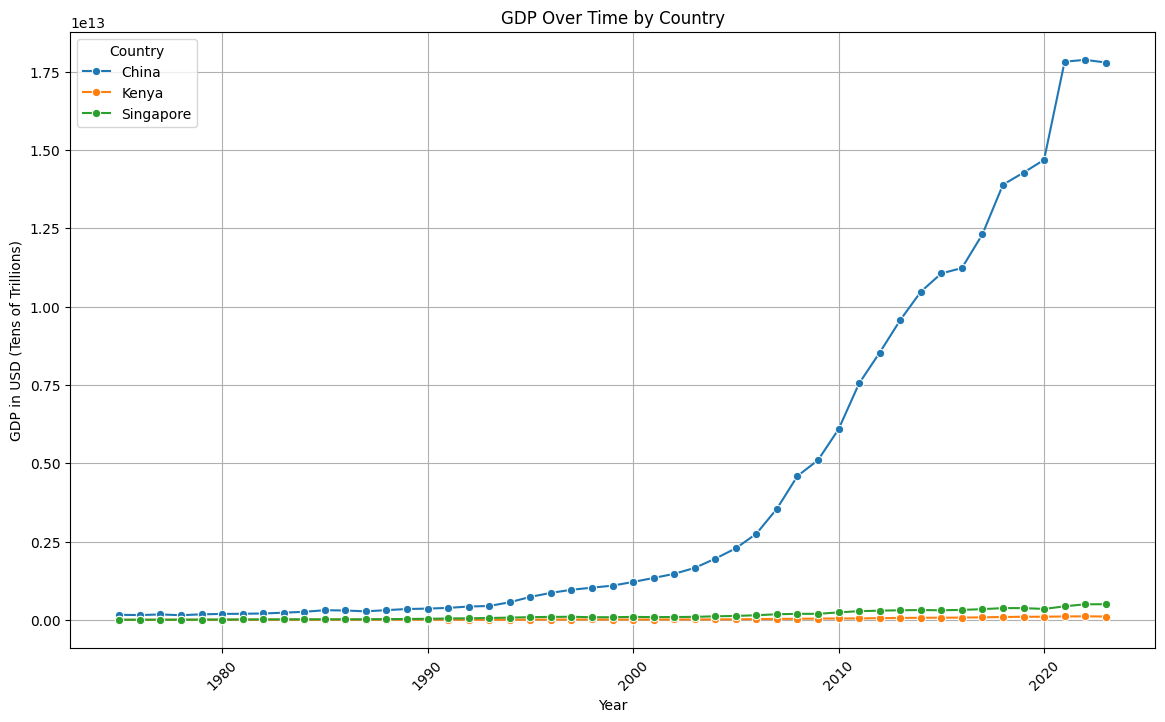

In [11]:
# Plotting gdp line plots per each country over time using p
df_gdp = df_t[df_t['Series Code'].str.contains('NY.GDP.MKTP.CD')]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_gdp, x='Year', y='Value', hue='Country Name', marker='o', errorbar=None)
plt.title('GDP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP in USD (Tens of Trillions)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid()

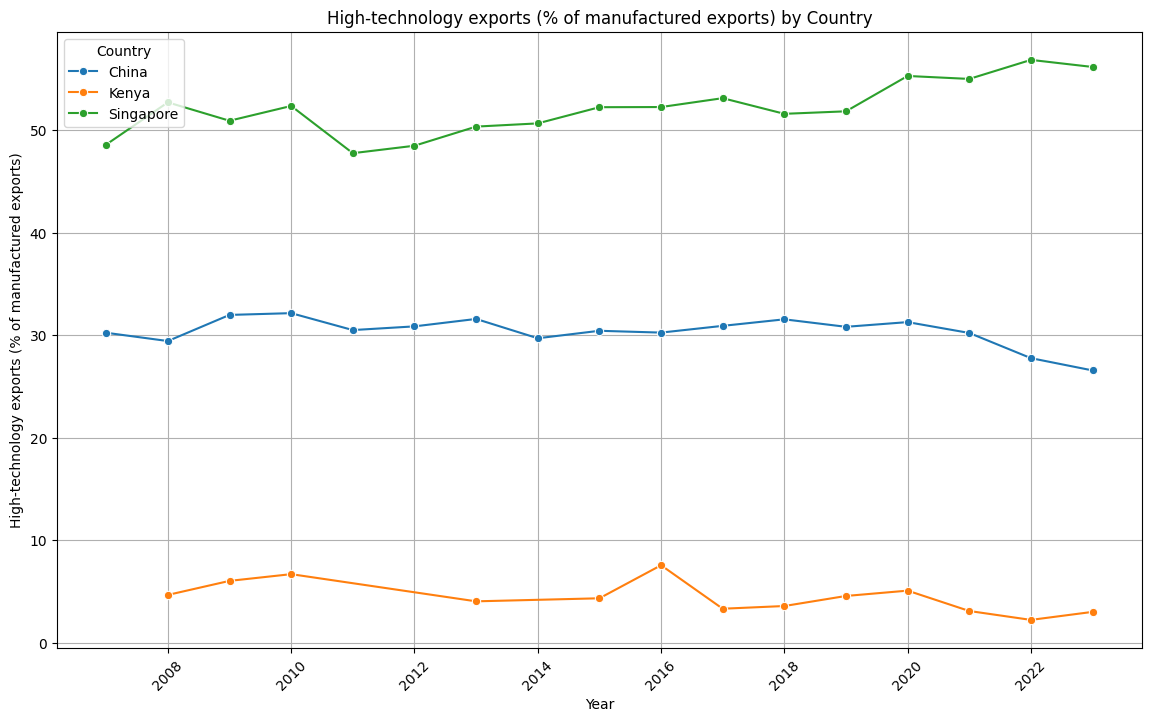

In [12]:
# Checking the High Tech Exports Indicator for the 3 countries
df_hightech = df_t[df_t['Series Code'].str.contains('TX.VAL.TECH.MF.ZS')]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_hightech, x='Year', y='Value', hue='Country Name', marker='o', errorbar=None)
plt.title('High-technology exports (% of manufactured exports) by Country')
plt.xlabel('Year')
plt.ylabel('High-technology exports (% of manufactured exports)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid()

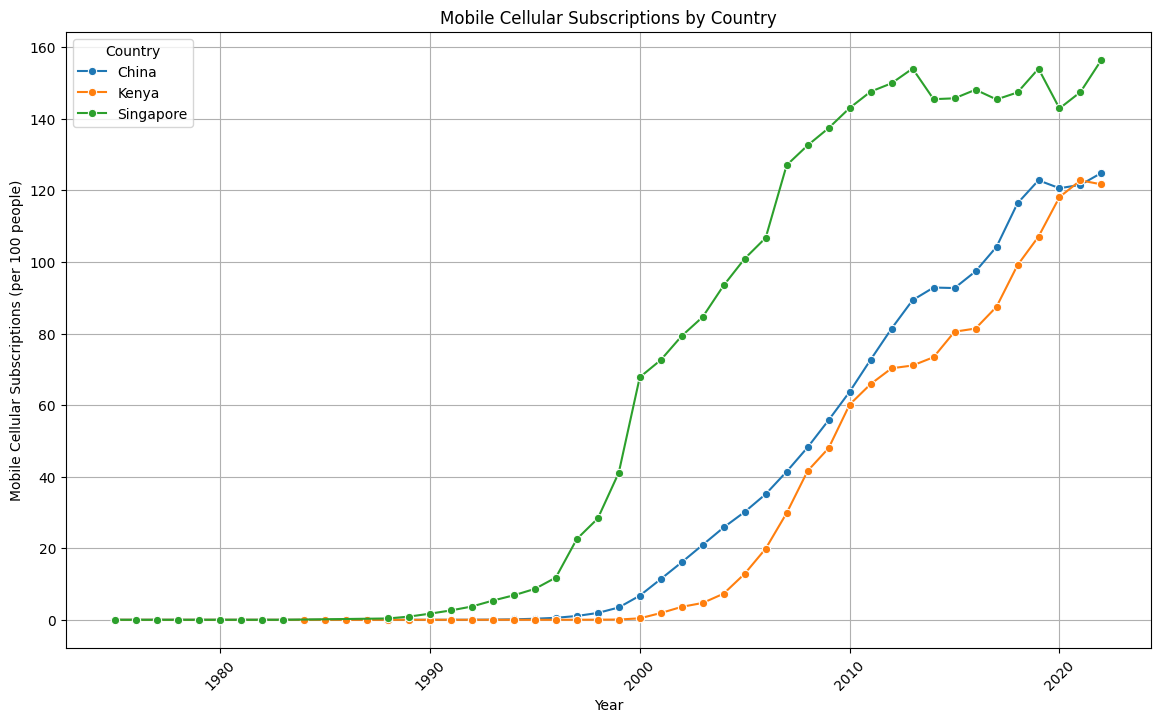

In [13]:
# Checking on the Mobile Cellular Subscriptions Indicator for the 3 countries
df_mobile = df_t[df_t['Series Code'].str.contains('IT.CEL.SETS.P2')]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_mobile, x='Year', y='Value', hue='Country Name', marker='o', errorbar=None)
plt.title('Mobile Cellular Subscriptions by Country')
plt.xlabel('Year')
plt.ylabel('Mobile Cellular Subscriptions (per 100 people)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid()
plt.show()



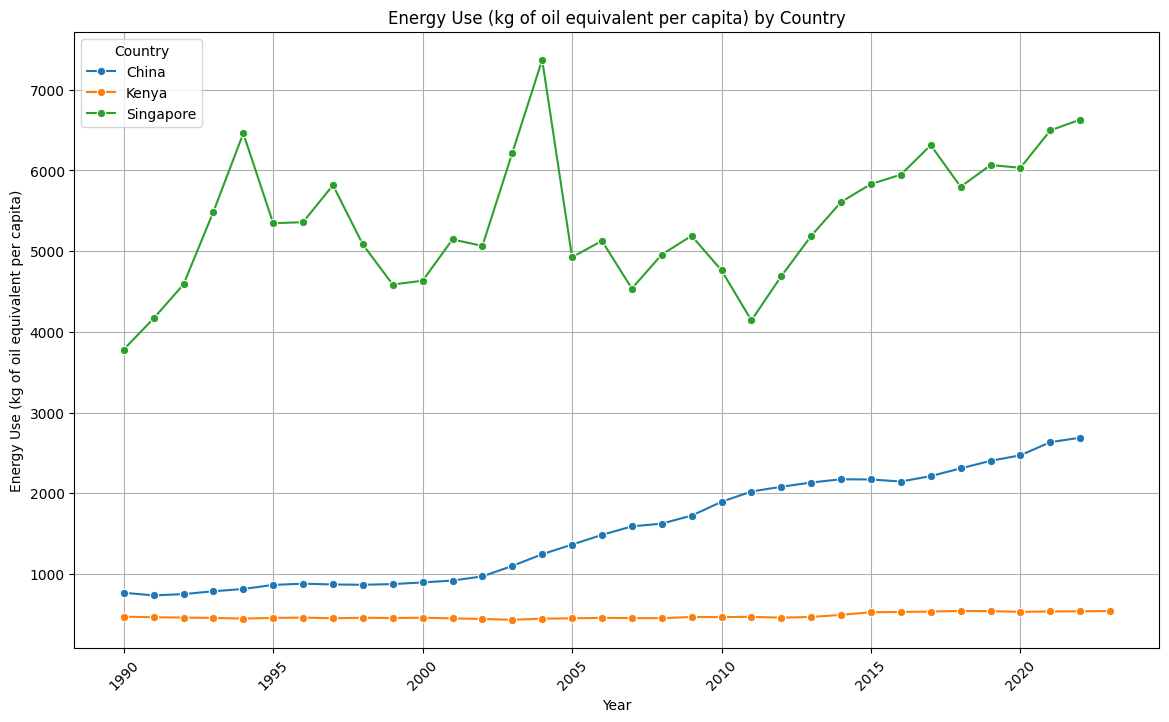

In [14]:
# Checking on the Energy use Indicator for the 3 countries
df_energy = df_t[df_t['Series Code'].str.contains('EG.USE.PCAP.KG.OE')]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_energy, x='Year', y='Value', hue='Country Name', marker='o', errorbar=None)
plt.title('Energy Use (kg of oil equivalent per capita) by Country')
plt.xlabel('Year')
plt.ylabel('Energy Use (kg of oil equivalent per capita)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid()
plt.show()


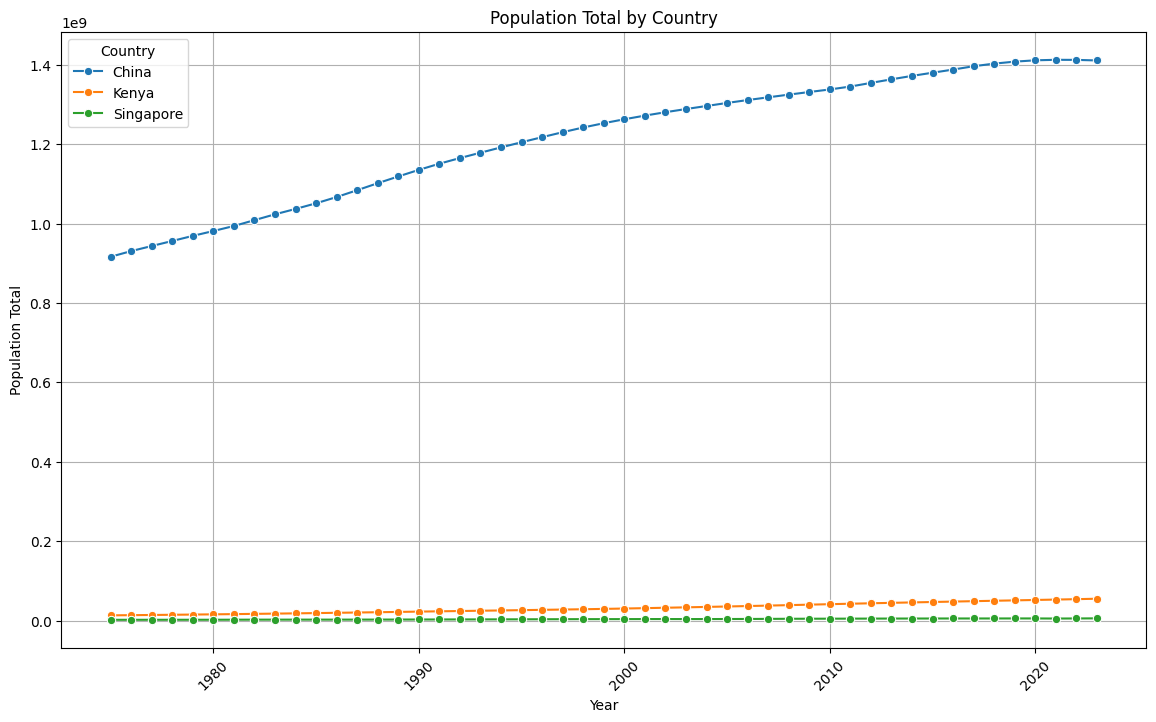

In [15]:
# Checking the population total indicator for the 3 countries
df_population = df_t[df_t['Series Code'].str.contains('SP.POP.TOTL')]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_population, x='Year', y='Value', hue='Country Name', marker='o', errorbar=None)
plt.title('Population Total by Country')
plt.xlabel('Year')
plt.ylabel('Population Total')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid()
plt.show()


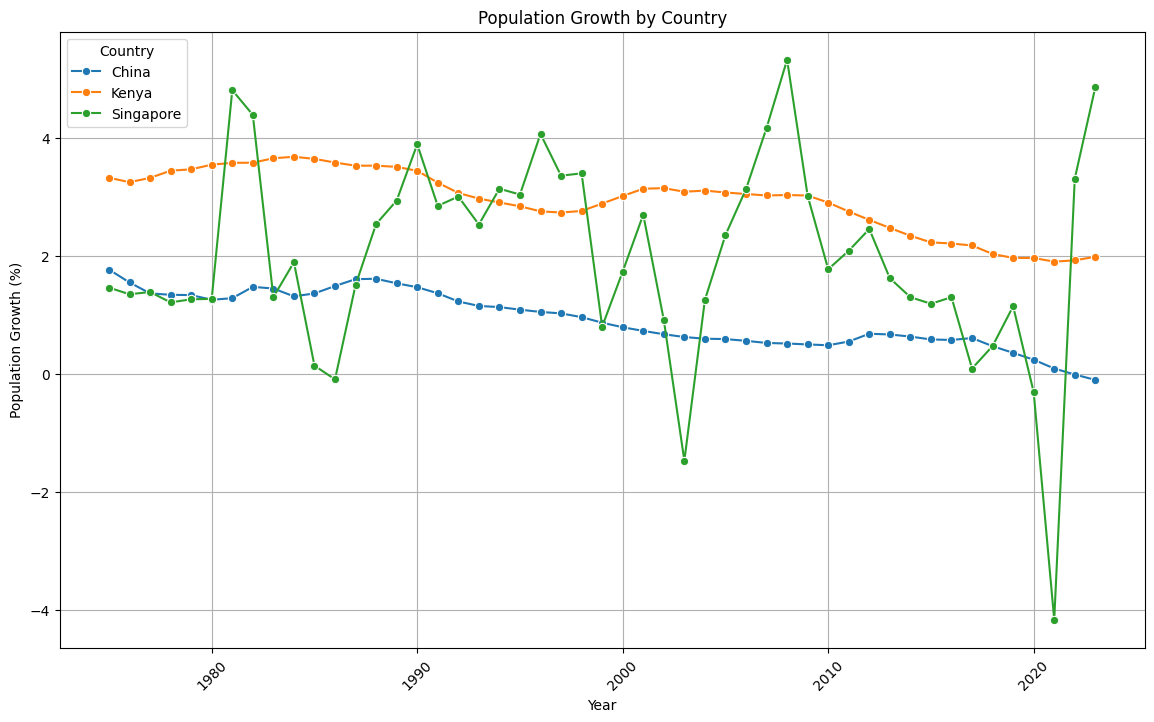

In [16]:
# Checking the Population Growth indicator for the 3 countries
df_population_growth = df_t[df_t['Series Code'].str.contains('SP.POP.GROW')]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_population_growth, x='Year', y='Value', hue='Country Name', marker='o', errorbar=None)
plt.title('Population Growth by Country')
plt.xlabel('Year')
plt.ylabel('Population Growth (%)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid()
plt.show()



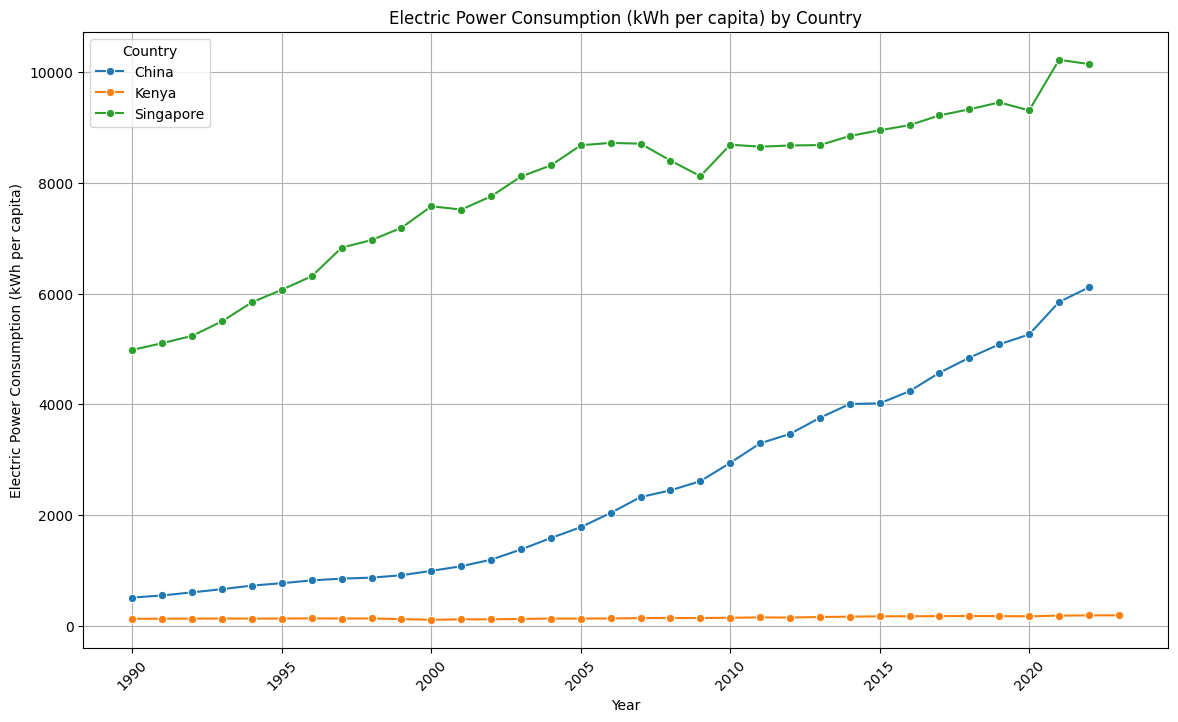

In [17]:
# Checking the electric power consumption indicator for the 3 countries
df_electric_power = df_t[df_t['Series Code'].str.contains('EG.USE.ELEC.KH.PC')]
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_electric_power, x='Year', y='Value', hue='Country Name', marker='o', errorbar=None)
plt.title('Electric Power Consumption (kWh per capita) by Country')
plt.xlabel('Year')
plt.ylabel('Electric Power Consumption (kWh per capita)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid()
plt.show()

## SINGAPORE
Singapore has long been the bench mark for economic transformation.


In the mid-80s, the country, through it's policies was able to move from the status of a 'developing country' to one a developed one. The aim of this analysis is to study the changes it made, with an emphasis on innovation and technology.


In [18]:
# Checking the dataframe
print(df_singapore.shape)
print(df_singapore.info())


(52, 50)
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Series Code  52 non-null     object 
 1   2022         38 non-null     float64
 2   2021         41 non-null     float64
 3   2020         42 non-null     float64
 4   2019         42 non-null     float64
 5   2018         42 non-null     float64
 6   2017         42 non-null     float64
 7   2016         42 non-null     float64
 8   2015         40 non-null     float64
 9   2014         40 non-null     float64
 10  2013         40 non-null     float64
 11  2012         39 non-null     float64
 12  2011         39 non-null     float64
 13  2010         39 non-null     float64
 14  2009         37 non-null     float64
 15  2008         37 non-null     float64
 16  2007         37 non-null     float64
 17  2006         36 non-null     float64
 18  2005         36 non-null     float64
 19  2004  

In [19]:
# The df
df_singapore.head()

,Series Code,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1983,1982,1981,1980,1979,1978,1977,1976,1975,2023
0,SP.POP.TOTL,5.637022e+06,5.453566e+06,5.685807e+06,5.703569e+06,5.638676e+06,5.612253e+06,5.607283e+06,5.535002e+06,5.469724e+06,...,2.681061e+06,2.646466e+06,2.532835e+06,2.413945e+06,2.383500e+06,2.353600e+06,2.325300e+06,2.293300e+06,2.262600e+06,5.917648e+06
1,SP.POP.GROW,3.308621e+00,-4.170336e+00,-3.119050e-01,1.144283e+00,4.697043e-01,8.859547e-02,1.297436e+00,1.186377e+00,1.298440e+00,...,1.298745e+00,4.388594e+00,4.807689e+00,1.269234e+00,1.262392e+00,1.209701e+00,1.385723e+00,1.347723e+00,1.460270e+00,4.858316e+00
2,AG.SRF.TOTL.K2,7.280000e+02,7.280000e+02,7.280000e+02,7.260000e+02,7.240000e+02,7.220000e+02,7.190000e+02,7.190000e+02,7.190000e+02,...,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,NaN
3,EN.POP.DNST,7.851006e+03,7.595496e+03,7.918951e+03,7.965878e+03,7.897305e+03,7.882378e+03,7.908721e+03,7.806773e+03,7.714702e+03,...,4.001584e+03,3.949949e+03,3.780351e+03,3.602903e+03,3.557463e+03,3.512836e+03,3.470597e+03,3.422836e+03,3.377015e+03,NaN
4,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Transposing the dataframe to set the series code as the columns
df_singapore_t = df_singapore.set_index('Series Code').T
df_singapore_t.index.name = "Year"
df_singapore_t.sort_index(inplace=True)
# Checking the transposed dataframe
df_singapore_t.head()

Series Code,SP.POP.TOTL,SP.POP.GROW,AG.SRF.TOTL.K2,EN.POP.DNST,SI.POV.NAHC,SI.POV.DDAY,NY.GNP.ATLS.CD,NY.GNP.PCAP.CD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,...,IT.CEL.SETS.P2,TX.VAL.TECH.MF.ZS,TG.VAL.TOTL.GD.ZS,TT.PRI.MRCH.XD.WD,DT.DOD.DECT.CD,DT.TDS.DECT.EX.ZS,SM.POP.NETM,BX.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD,DT.ODA.ALLD.CD
Year,,,,,,,,,,,,,,,,,,,,,
1975,2262600.0,1.460270,680.0,3377.014925,NaN,NaN,6.011457e+09,2660.0,NaN,NaN,...,0.0,NaN,239.790236,NaN,NaN,NaN,4104.0,NaN,2.918231e+08,1.171000e+07
1976,2293300.0,1.347723,680.0,3422.835821,NaN,NaN,6.721882e+09,2930.0,NaN,NaN,...,0.0,NaN,247.444398,NaN,NaN,NaN,949.0,NaN,2.306906e+08,1.101000e+07
1977,2325300.0,1.385723,680.0,3470.597015,NaN,NaN,7.020747e+09,3020.0,NaN,NaN,...,0.0,NaN,282.719037,NaN,NaN,NaN,2757.0,NaN,2.914651e+08,1.231000e+07
1978,2353600.0,1.209701,680.0,3512.835821,NaN,NaN,7.927099e+09,3370.0,NaN,NaN,...,0.0,NaN,308.560009,NaN,NaN,NaN,436.0,NaN,2.999088e+08,6.630000e+06
1979,2383500.0,1.262392,680.0,3557.462687,NaN,NaN,9.514855e+09,3990.0,NaN,NaN,...,0.0,NaN,342.866176,NaN,NaN,NaN,-2384.0,NaN,8.360318e+08,5.520000e+06


#### Indicator Analysis for Singapore

##### 1. GDP (Current USD)

In [21]:
# Visualizing the GDP growth in Singapore using plotly express
fig = px.line(df_singapore_t, x=df_singapore_t.index, y='NY.GDP.MKTP.CD', title='GDP Growth in Singapore (1975-2023)')
fig.update_layout(xaxis_title='Year', yaxis_title='GDP (in USD)', xaxis=dict(tickmode='linear', dtick=5))
fig.show()


In [22]:
# Checking for nulls on transposed dataframe
df_singapore_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 1975 to 2023
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        49 non-null     float64
 1   SP.POP.GROW        49 non-null     float64
 2   AG.SRF.TOTL.K2     48 non-null     float64
 3   EN.POP.DNST        48 non-null     float64
 4   SI.POV.NAHC        0 non-null      float64
 5   SI.POV.DDAY        0 non-null      float64
 6   NY.GNP.ATLS.CD     49 non-null     float64
 7   NY.GNP.PCAP.CD     49 non-null     float64
 8   NY.GNP.MKTP.PP.CD  34 non-null     float64
 9   NY.GNP.PCAP.PP.CD  34 non-null     float64
 10  SI.DST.FRST.20     0 non-null      float64
 11  SP.DYN.LE00.IN     49 non-null     float64
 12  SP.DYN.TFRT.IN     49 non-null     float64
 13  SP.ADO.TFRT        49 non-null     float64
 14  SP.DYN.CONU.ZS     5 non-null      float64
 15  SH.STA.BRTC.ZS     26 non-null     float64
 16  SH.DYN.MORT        49 non-nu

In [23]:
# Dropping the rows that dont have any values in the TX.VAL.TECH.MF.ZS column
df_singapore_t = df_singapore_t.dropna(subset=['TX.VAL.TECH.MF.ZS'])
# Checking the transposed dataframe again
df_singapore_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2007 to 2023
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        17 non-null     float64
 1   SP.POP.GROW        17 non-null     float64
 2   AG.SRF.TOTL.K2     16 non-null     float64
 3   EN.POP.DNST        16 non-null     float64
 4   SI.POV.NAHC        0 non-null      float64
 5   SI.POV.DDAY        0 non-null      float64
 6   NY.GNP.ATLS.CD     17 non-null     float64
 7   NY.GNP.PCAP.CD     17 non-null     float64
 8   NY.GNP.MKTP.PP.CD  17 non-null     float64
 9   NY.GNP.PCAP.PP.CD  17 non-null     float64
 10  SI.DST.FRST.20     0 non-null      float64
 11  SP.DYN.LE00.IN     17 non-null     float64
 12  SP.DYN.TFRT.IN     17 non-null     float64
 13  SP.ADO.TFRT        17 non-null     float64
 14  SP.DYN.CONU.ZS     0 non-null      float64
 15  SH.STA.BRTC.ZS     15 non-null     float64
 16  SH.DYN.MORT        17 non-nu

In [24]:
df_singapore_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2007 to 2023
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        17 non-null     float64
 1   SP.POP.GROW        17 non-null     float64
 2   AG.SRF.TOTL.K2     16 non-null     float64
 3   EN.POP.DNST        16 non-null     float64
 4   SI.POV.NAHC        0 non-null      float64
 5   SI.POV.DDAY        0 non-null      float64
 6   NY.GNP.ATLS.CD     17 non-null     float64
 7   NY.GNP.PCAP.CD     17 non-null     float64
 8   NY.GNP.MKTP.PP.CD  17 non-null     float64
 9   NY.GNP.PCAP.PP.CD  17 non-null     float64
 10  SI.DST.FRST.20     0 non-null      float64
 11  SP.DYN.LE00.IN     17 non-null     float64
 12  SP.DYN.TFRT.IN     17 non-null     float64
 13  SP.ADO.TFRT        17 non-null     float64
 14  SP.DYN.CONU.ZS     0 non-null      float64
 15  SH.STA.BRTC.ZS     15 non-null     float64
 16  SH.DYN.MORT        17 non-nu

In [25]:
# Dropping the columns with nulls more than 5
df_singapore_t = df_singapore_t.loc[:, df_singapore_t.isna().sum() < 5]
df_singapore_t.info()



<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2007 to 2023
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        17 non-null     float64
 1   SP.POP.GROW        17 non-null     float64
 2   AG.SRF.TOTL.K2     16 non-null     float64
 3   EN.POP.DNST        16 non-null     float64
 4   NY.GNP.ATLS.CD     17 non-null     float64
 5   NY.GNP.PCAP.CD     17 non-null     float64
 6   NY.GNP.MKTP.PP.CD  17 non-null     float64
 7   NY.GNP.PCAP.PP.CD  17 non-null     float64
 8   SP.DYN.LE00.IN     17 non-null     float64
 9   SP.DYN.TFRT.IN     17 non-null     float64
 10  SP.ADO.TFRT        17 non-null     float64
 11  SH.STA.BRTC.ZS     15 non-null     float64
 12  SH.DYN.MORT        17 non-null     float64
 13  SH.IMM.MEAS        17 non-null     float64
 14  SE.PRM.ENRR        13 non-null     float64
 15  SE.SEC.ENRR        13 non-null     float64
 16  AG.LND.FRST.K2     16 non-nu

In [26]:
df_singapore_t

Series Code,SP.POP.TOTL,SP.POP.GROW,AG.SRF.TOTL.K2,EN.POP.DNST,NY.GNP.ATLS.CD,NY.GNP.PCAP.CD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,...,GC.REV.XGRT.GD.ZS,GC.TAX.TOTL.GD.ZS,MS.MIL.XPND.GD.ZS,IT.CEL.SETS.P2,TX.VAL.TECH.MF.ZS,TG.VAL.TOTL.GD.ZS,TT.PRI.MRCH.XD.WD,SM.POP.NETM,BX.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD
Year,,,,,,,,,,,,,,,,,,,,,
2007,4588599.0,4.166003,705.0,6602.300719,1.652433e+11,36010.0,3.074134e+11,67000.0,80.441463,1.29,...,19.250261,12.820428,3.602553,127.037847,48.578106,310.853162,96.285213,192292.0,0.0,4.733795e+10
2008,4839396.0,5.321517,710.0,6913.422857,1.801696e+11,37230.0,3.157402e+11,65240.0,80.790244,1.28,...,20.414935,13.754391,3.850027,132.580964,52.688973,339.822898,95.797397,176182.0,0.0,1.359830e+10
2009,4987573.0,3.015950,710.0,7125.104286,1.861205e+11,37320.0,3.131125e+11,62780.0,81.241463,1.22,...,17.054511,12.954927,3.882423,137.401850,50.897158,265.576228,96.610667,95841.0,0.0,2.343606e+10
2010,5076732.0,1.771833,712.0,7231.811966,2.280902e+11,44930.0,3.786525e+11,74590.0,81.541463,1.15,...,16.779064,12.785824,3.381398,143.012904,52.339238,276.328585,96.044443,72571.0,0.0,5.532243e+10
2011,5183688.0,2.084902,714.0,7363.193182,2.501012e+11,48250.0,4.007078e+11,77300.0,81.743902,1.20,...,17.020963,13.105722,3.193875,147.581752,47.737156,277.521018,93.442524,89856.0,0.0,4.915566e+10
2012,5312437.0,2.453390,716.0,7524.698300,2.747066e+11,51710.0,4.167956e+11,78460.0,81.995122,1.29,...,17.476805,13.580669,3.108166,149.927411,48.462620,267.073871,92.487524,78501.0,0.0,5.531081e+10
2013,5399162.0,1.619308,717.0,7636.721358,2.940658e+11,54470.0,4.244444e+11,78610.0,82.246341,1.19,...,17.239652,13.271250,3.038491,154.034626,50.327186,254.657412,94.210649,52176.0,0.0,6.438951e+10
2014,5469724.0,1.298440,719.0,7714.702398,3.083791e+11,56380.0,4.464054e+11,81610.0,82.495122,1.25,...,18.020899,13.556557,3.047860,145.477014,50.640326,251.947843,93.087751,40154.0,0.0,6.869847e+10
2015,5535002.0,1.186377,719.0,7806.772920,2.942169e+11,53160.0,4.494935e+11,81210.0,82.743902,1.24,...,17.997110,13.139775,3.046713,145.718120,52.217455,210.609436,100.000000,41852.0,0.0,6.977455e+10


In [27]:
df_singapore_t.isna().sum()

Series Code
SP.POP.TOTL          0
SP.POP.GROW          0
AG.SRF.TOTL.K2       1
EN.POP.DNST          1
NY.GNP.ATLS.CD       0
NY.GNP.PCAP.CD       0
NY.GNP.MKTP.PP.CD    0
NY.GNP.PCAP.PP.CD    0
SP.DYN.LE00.IN       0
SP.DYN.TFRT.IN       0
SP.ADO.TFRT          0
SH.STA.BRTC.ZS       2
SH.DYN.MORT          0
SH.IMM.MEAS          0
SE.PRM.ENRR          4
SE.SEC.ENRR          4
AG.LND.FRST.K2       1
ER.H2O.FWTL.ZS       2
SP.URB.GROW          0
EG.USE.PCAP.KG.OE    1
EG.USE.ELEC.KH.PC    1
NY.GDP.MKTP.CD       0
NY.GDP.MKTP.KD.ZG    0
NY.GDP.DEFL.KD.ZG    0
NV.AGR.TOTL.ZS       0
NV.IND.TOTL.ZS       0
NE.EXP.GNFS.ZS       0
NE.IMP.GNFS.ZS       0
NE.GDI.TOTL.ZS       0
GC.REV.XGRT.GD.ZS    0
GC.TAX.TOTL.GD.ZS    0
MS.MIL.XPND.GD.ZS    0
IT.CEL.SETS.P2       1
TX.VAL.TECH.MF.ZS    0
TG.VAL.TOTL.GD.ZS    0
TT.PRI.MRCH.XD.WD    2
SM.POP.NETM          0
BX.TRF.PWKR.CD.DT    0
BX.KLT.DINV.CD.WD    0
dtype: int64

In [28]:
# Plotting the distributions of the columns that have any null values.
null_cols = df_singapore_t.columns[df_singapore_t.isna().sum() > 0]



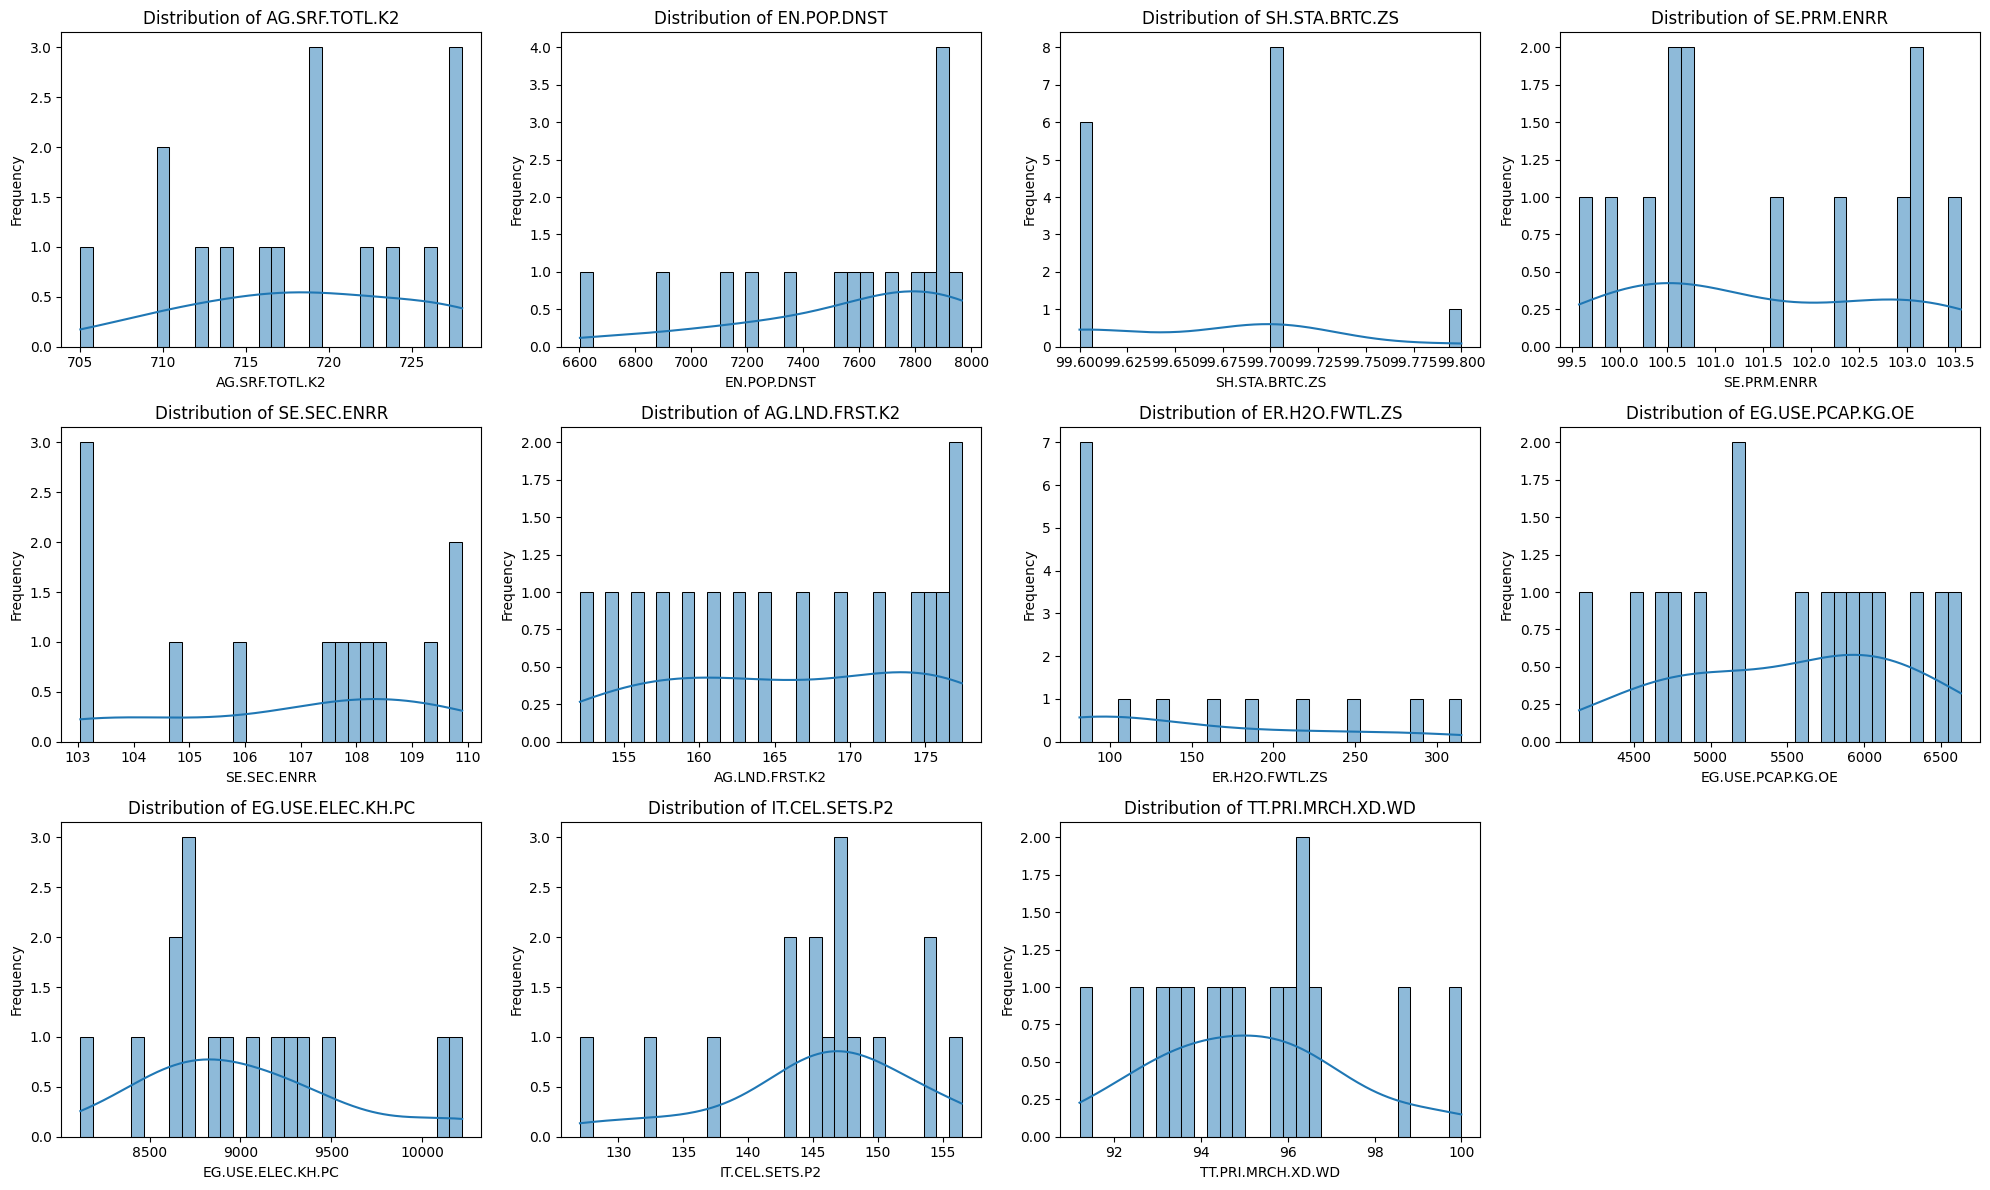

In [29]:
n = len(null_cols)
rows = (n + 3) // 4  # up to 4 plots per row
fig, ax = plt.subplots(rows, 4, figsize=(20, 4 * rows))
ax = ax.flatten()

for i, col in enumerate(null_cols):
    sns.histplot(df_singapore_t[col], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [30]:
# We'll use KNN Imputer to fill the null values in the transposed dataframe
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
# Imputing the missing values in the transposed dataframe
df_singapore_t_imputed = pd.DataFrame(imputer.fit_transform(df_singapore_t), columns=df_singapore_t.columns, index=df_singapore_t.index)
# Checking the imputed dataframe
df_singapore_t_imputed.info()



<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2007 to 2023
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        17 non-null     float64
 1   SP.POP.GROW        17 non-null     float64
 2   AG.SRF.TOTL.K2     17 non-null     float64
 3   EN.POP.DNST        17 non-null     float64
 4   NY.GNP.ATLS.CD     17 non-null     float64
 5   NY.GNP.PCAP.CD     17 non-null     float64
 6   NY.GNP.MKTP.PP.CD  17 non-null     float64
 7   NY.GNP.PCAP.PP.CD  17 non-null     float64
 8   SP.DYN.LE00.IN     17 non-null     float64
 9   SP.DYN.TFRT.IN     17 non-null     float64
 10  SP.ADO.TFRT        17 non-null     float64
 11  SH.STA.BRTC.ZS     17 non-null     float64
 12  SH.DYN.MORT        17 non-null     float64
 13  SH.IMM.MEAS        17 non-null     float64
 14  SE.PRM.ENRR        17 non-null     float64
 15  SE.SEC.ENRR        17 non-null     float64
 16  AG.LND.FRST.K2     17 non-nu

In [31]:
df_singapore_t_imputed

Series Code,SP.POP.TOTL,SP.POP.GROW,AG.SRF.TOTL.K2,EN.POP.DNST,NY.GNP.ATLS.CD,NY.GNP.PCAP.CD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,...,GC.REV.XGRT.GD.ZS,GC.TAX.TOTL.GD.ZS,MS.MIL.XPND.GD.ZS,IT.CEL.SETS.P2,TX.VAL.TECH.MF.ZS,TG.VAL.TOTL.GD.ZS,TT.PRI.MRCH.XD.WD,SM.POP.NETM,BX.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD
Year,,,,,,,,,,,,,,,,,,,,,
2007,4588599.0,4.166003,705.0,6602.300719,1.652433e+11,36010.0,3.074134e+11,67000.0,80.441463,1.29,...,19.250261,12.820428,3.602553,127.037847,48.578106,310.853162,96.285213,192292.0,0.0,4.733795e+10
2008,4839396.0,5.321517,710.0,6913.422857,1.801696e+11,37230.0,3.157402e+11,65240.0,80.790244,1.28,...,20.414935,13.754391,3.850027,132.580964,52.688973,339.822898,95.797397,176182.0,0.0,1.359830e+10
2009,4987573.0,3.015950,710.0,7125.104286,1.861205e+11,37320.0,3.131125e+11,62780.0,81.241463,1.22,...,17.054511,12.954927,3.882423,137.401850,50.897158,265.576228,96.610667,95841.0,0.0,2.343606e+10
2010,5076732.0,1.771833,712.0,7231.811966,2.280902e+11,44930.0,3.786525e+11,74590.0,81.541463,1.15,...,16.779064,12.785824,3.381398,143.012904,52.339238,276.328585,96.044443,72571.0,0.0,5.532243e+10
2011,5183688.0,2.084902,714.0,7363.193182,2.501012e+11,48250.0,4.007078e+11,77300.0,81.743902,1.20,...,17.020963,13.105722,3.193875,147.581752,47.737156,277.521018,93.442524,89856.0,0.0,4.915566e+10
2012,5312437.0,2.453390,716.0,7524.698300,2.747066e+11,51710.0,4.167956e+11,78460.0,81.995122,1.29,...,17.476805,13.580669,3.108166,149.927411,48.462620,267.073871,92.487524,78501.0,0.0,5.531081e+10
2013,5399162.0,1.619308,717.0,7636.721358,2.940658e+11,54470.0,4.244444e+11,78610.0,82.246341,1.19,...,17.239652,13.271250,3.038491,154.034626,50.327186,254.657412,94.210649,52176.0,0.0,6.438951e+10
2014,5469724.0,1.298440,719.0,7714.702398,3.083791e+11,56380.0,4.464054e+11,81610.0,82.495122,1.25,...,18.020899,13.556557,3.047860,145.477014,50.640326,251.947843,93.087751,40154.0,0.0,6.869847e+10
2015,5535002.0,1.186377,719.0,7806.772920,2.942169e+11,53160.0,4.494935e+11,81210.0,82.743902,1.24,...,17.997110,13.139775,3.046713,145.718120,52.217455,210.609436,100.000000,41852.0,0.0,6.977455e+10


In [32]:
# Dropping the GDP column as a feature for the model
y = df_singapore_t_imputed['NY.GDP.MKTP.CD']
X = df_singapore_t_imputed.drop(columns=['NY.GDP.MKTP.CD'])
X.shape, y.shape


((17, 38), (17,))

In [33]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<Axes: xlabel='Series Code'>

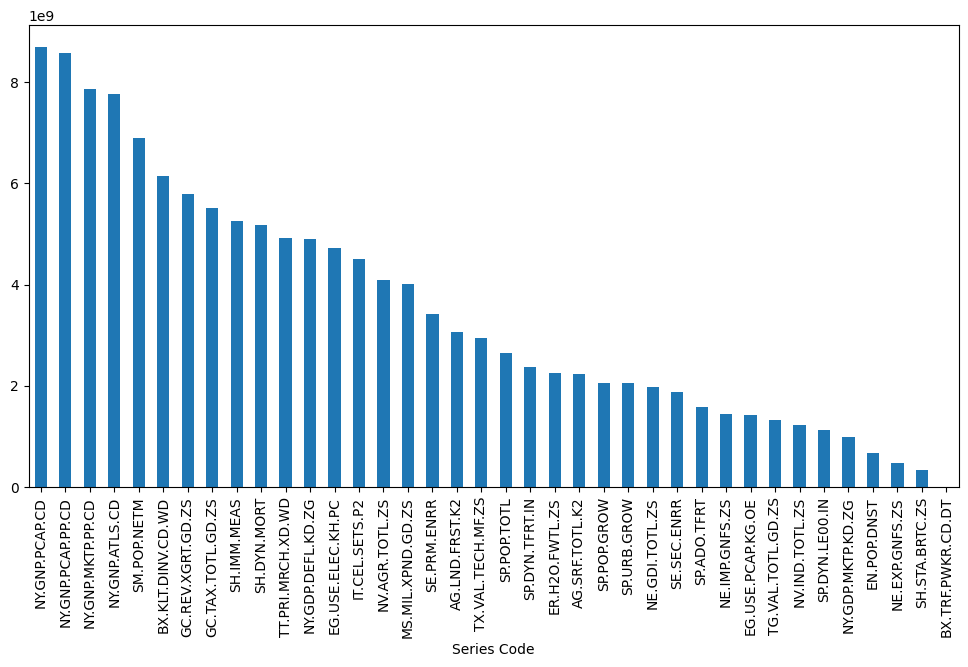

In [34]:
# Modeling using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Checking which features are the most important
importance_ln_sgp = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
abs(importance_ln_sgp).sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))

In [35]:
# Predicting the GDP for the test set
y_pred_ln = model.predict(X_test_scaled)
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_ln)
r2 = r2_score(y_test, y_pred_ln)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.0393463293965477e+20
R-squared: 0.9935698333686047


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_e

<Axes: xlabel='Series Code'>

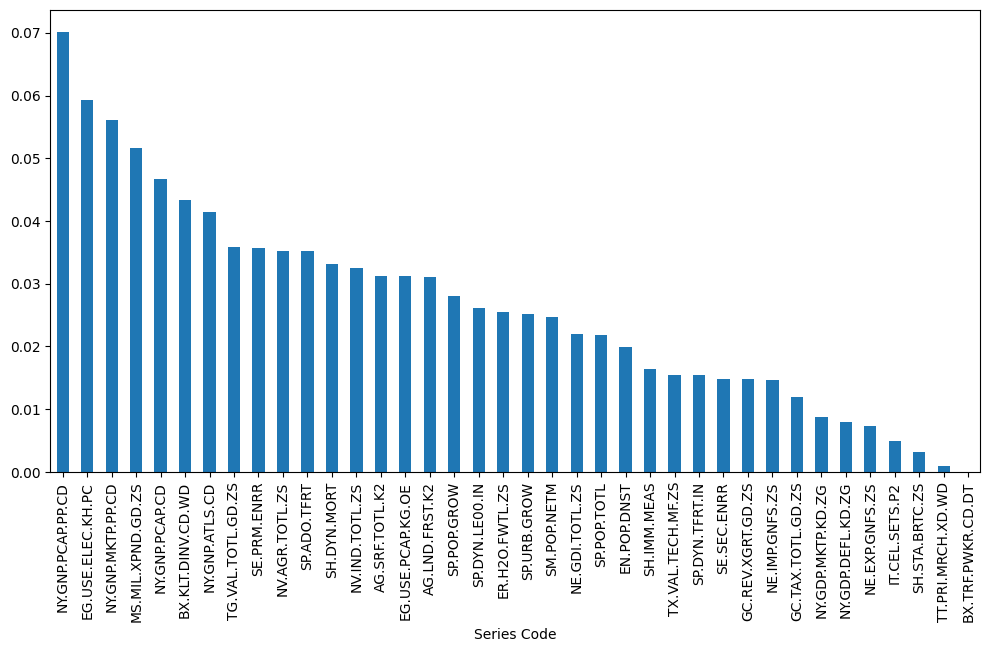

In [36]:
# Using Random Forest Regressor for better performance
from sklearn.ensemble import RandomForestRegressor
# Using a param grid to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Checking the feature importances
importance_rf_sgp = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Best Parameters:", grid_search.best_params_)
importance_rf_sgp.plot(kind='bar', figsize=(12, 6))


In [37]:
# Predicting using the Random Forest model
y_pred_rf = grid_search.predict(X_test_scaled)
# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 2.6266529104055475e+21
Random Forest R-squared: 0.8374957853889422


In [38]:
# Using XGBoost for better performance
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
# Fitting the model
xgb_model.fit(X_train_scaled, y_train)
# Predicting using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test_scaled)
# Evaluating the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')


XGBoost Mean Squared Error: 4.0642747923533824e+20
XGBoost R-squared: 0.9748553841857647


<Axes: xlabel='Series Code'>

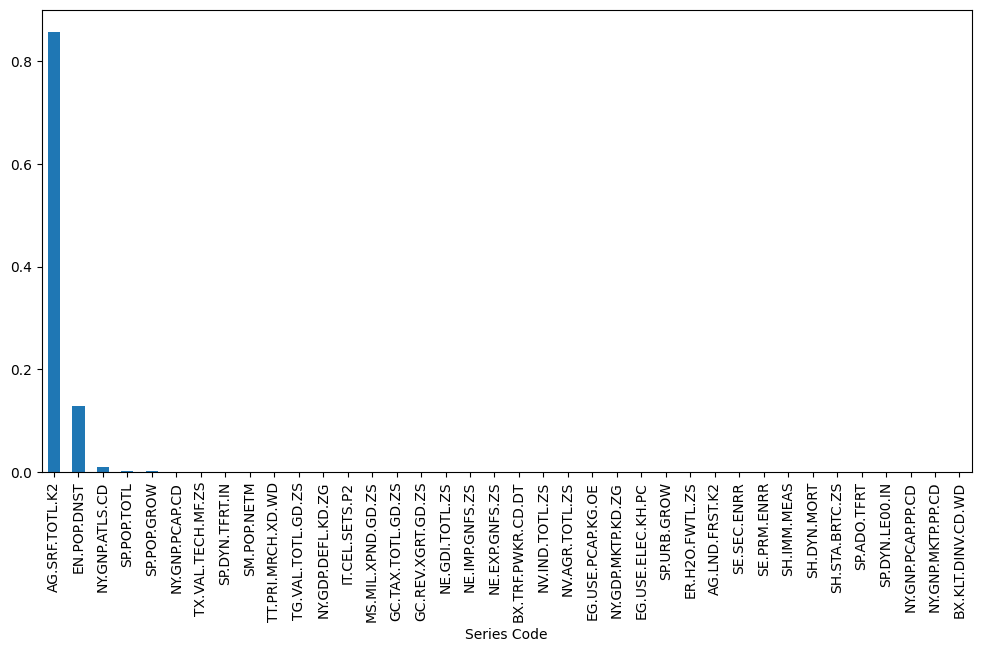

In [39]:
# Plotting the importances of the features in the XGBoost model
importance_xgb_sgp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importance_xgb_sgp.plot(kind='bar', figsize=(12, 6))

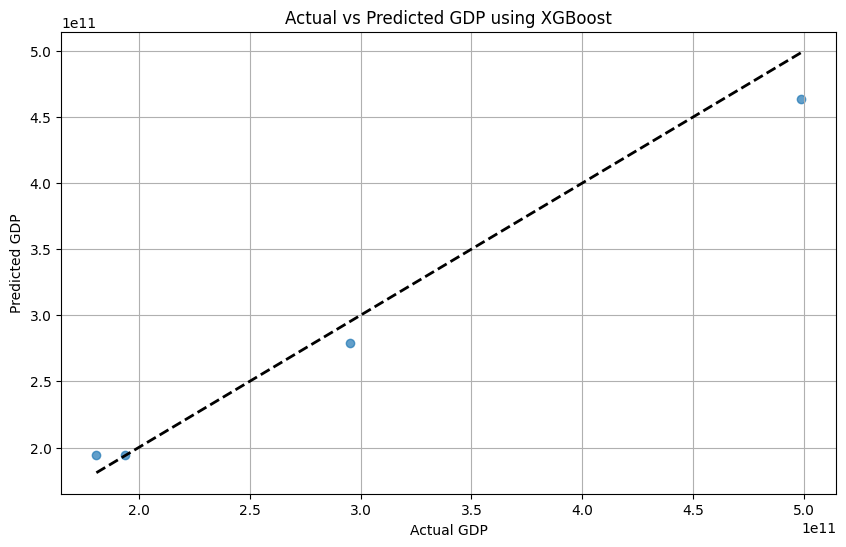

In [40]:
# Plotting the predictions vs actual values for the XGBoost model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP using XGBoost')
plt.grid()
plt.show()


# CHINA


In [41]:
# Transposing the dataframe to set the series code as the columns
df_china_t = df_china.set_index('Series Code').T
df_china_t.index.name = "Year"
df_china_t.sort_index(inplace=True)
# Checking the transposed dataframe
df_china_t.head()

Series Code,SP.POP.TOTL,SP.POP.GROW,AG.SRF.TOTL.K2,EN.POP.DNST,SI.POV.NAHC,SI.POV.DDAY,NY.GNP.ATLS.CD,NY.GNP.PCAP.CD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,...,IT.CEL.SETS.P2,TX.VAL.TECH.MF.ZS,TG.VAL.TOTL.GD.ZS,TT.PRI.MRCH.XD.WD,DT.DOD.DECT.CD,DT.TDS.DECT.EX.ZS,SM.POP.NETM,BX.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD,DT.ODA.ALLD.CD
Year,,,,,,,,,,,,,,,,,,,,,
1975,916395000.0,1.766392,9562950.0,97.610843,NaN,NaN,1.873544e+11,200.0,NaN,NaN,...,0.0,NaN,9.554577,NaN,NaN,NaN,-115173.0,NaN,NaN,NaN
1976,930685000.0,1.547338,9562950.0,99.132959,NaN,NaN,1.736619e+11,190.0,NaN,NaN,...,0.0,NaN,8.836602,NaN,NaN,NaN,-55109.0,NaN,NaN,NaN
1977,943455000.0,1.362779,9562950.0,100.493170,NaN,NaN,1.836731e+11,190.0,NaN,NaN,...,0.0,NaN,8.384784,NaN,NaN,NaN,-15323.0,NaN,NaN,NaN
1978,956165000.0,1.338182,9562950.0,101.846990,NaN,NaN,1.877096e+11,200.0,NaN,NaN,...,0.0,NaN,14.100504,NaN,NaN,NaN,-9916.0,NaN,NaN,NaN
1979,969005000.0,1.333928,9562950.0,103.214657,NaN,NaN,2.030294e+11,210.0,NaN,NaN,...,0.0,NaN,16.398307,NaN,NaN,NaN,-13704.0,NaN,80000.0,1.685000e+07


In [42]:
# Dropping the rows that dont have any values in the TX.VAL.TECH.MF.ZS column
df_china_t = df_china_t.dropna(subset=['TX.VAL.TECH.MF.ZS'])
# Checking the transposed dataframe again
df_china_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2007 to 2023
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        17 non-null     float64
 1   SP.POP.GROW        17 non-null     float64
 2   AG.SRF.TOTL.K2     16 non-null     float64
 3   EN.POP.DNST        16 non-null     float64
 4   SI.POV.NAHC        11 non-null     float64
 5   SI.POV.DDAY        13 non-null     float64
 6   NY.GNP.ATLS.CD     17 non-null     float64
 7   NY.GNP.PCAP.CD     17 non-null     float64
 8   NY.GNP.MKTP.PP.CD  17 non-null     float64
 9   NY.GNP.PCAP.PP.CD  17 non-null     float64
 10  SI.DST.FRST.20     13 non-null     float64
 11  SP.DYN.LE00.IN     17 non-null     float64
 12  SP.DYN.TFRT.IN     17 non-null     float64
 13  SP.ADO.TFRT        17 non-null     float64
 14  SP.DYN.CONU.ZS     1 non-null      float64
 15  SH.STA.BRTC.ZS     10 non-null     float64
 16  SH.DYN.MORT        17 non-nu

In [43]:
# Removing columns with nulls more than 5
df_china_t = df_china_t.loc[:, df_china_t.isna().sum() < 5]
# Checking the transposed dataframe
df_china_t.isna().sum()

Series Code
SP.POP.TOTL          0
SP.POP.GROW          0
AG.SRF.TOTL.K2       1
EN.POP.DNST          1
SI.POV.DDAY          4
NY.GNP.ATLS.CD       0
NY.GNP.PCAP.CD       0
NY.GNP.MKTP.PP.CD    0
NY.GNP.PCAP.PP.CD    0
SI.DST.FRST.20       4
SP.DYN.LE00.IN       0
SP.DYN.TFRT.IN       0
SP.ADO.TFRT          0
SH.DYN.MORT          0
SH.IMM.MEAS          0
SE.PRM.ENRR          0
SE.ENR.PRSC.FM.ZS    2
AG.LND.FRST.K2       1
ER.H2O.FWTL.ZS       2
SP.URB.GROW          0
EG.USE.PCAP.KG.OE    1
EG.USE.ELEC.KH.PC    1
NY.GDP.MKTP.CD       0
NY.GDP.MKTP.KD.ZG    0
NY.GDP.DEFL.KD.ZG    0
NV.AGR.TOTL.ZS       0
NV.IND.TOTL.ZS       0
NE.EXP.GNFS.ZS       0
NE.IMP.GNFS.ZS       0
NE.GDI.TOTL.ZS       0
GC.REV.XGRT.GD.ZS    0
GC.TAX.TOTL.GD.ZS    0
MS.MIL.XPND.GD.ZS    0
IT.CEL.SETS.P2       1
TX.VAL.TECH.MF.ZS    0
TG.VAL.TOTL.GD.ZS    0
TT.PRI.MRCH.XD.WD    2
DT.DOD.DECT.CD       0
DT.TDS.DECT.EX.ZS    0
SM.POP.NETM          0
BX.TRF.PWKR.CD.DT    0
BX.KLT.DINV.CD.WD    0
DT.ODA.ALLD.CD       1

In [44]:
# Using the initiated imputer to fill the null values in the transposed dataframe
df_china_t_imputed = pd.DataFrame(imputer.fit_transform(df_china_t), columns=df_china_t.columns, index=df_china_t.index)
# Checking the imputed dataframe
df_china_t_imputed.head()

Series Code,SP.POP.TOTL,SP.POP.GROW,AG.SRF.TOTL.K2,EN.POP.DNST,SI.POV.DDAY,NY.GNP.ATLS.CD,NY.GNP.PCAP.CD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,SI.DST.FRST.20,...,IT.CEL.SETS.P2,TX.VAL.TECH.MF.ZS,TG.VAL.TOTL.GD.ZS,TT.PRI.MRCH.XD.WD,DT.DOD.DECT.CD,DT.TDS.DECT.EX.ZS,SM.POP.NETM,BX.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD,DT.ODA.ALLD.CD
Year,,,,,,,,,,,,,,,,,,,,,
2007,1.317885e+09,0.522272,9562910.8,140.376588,10.34,3.310314e+12,2510.0,9.008385e+12,6840.0,5.44,...,41.415098,30.237494,61.306226,93.892022,3.777492e+11,2.376860,-1042019.0,6.833130e+09,1.562493e+11,1.714510e+09
2008,1.324655e+09,0.512387,9562910.8,141.097705,17.30,4.104175e+12,3100.0,1.010778e+13,7630.0,5.20,...,48.207851,29.431934,55.791731,88.872379,3.864231e+11,2.071532,-764370.0,9.136547e+09,1.715347e+11,1.749950e+09
2009,1.331260e+09,0.497381,9562911.0,141.801244,10.34,4.901280e+12,3680.0,1.103874e+13,8290.0,5.44,...,55.798650,31.977577,43.270652,96.595934,4.544956e+11,2.910785,-177135.0,9.209490e+09,1.310571e+11,1.471120e+09
2010,1.337705e+09,0.482960,9562911.0,142.487743,13.40,5.801876e+12,4340.0,1.232890e+13,9220.0,5.10,...,63.715213,32.150117,48.856700,87.004247,7.427375e+11,2.896431,-184144.0,1.363604e+10,2.437034e+11,6.718900e+08
2011,1.345035e+09,0.546458,9562911.0,143.268510,10.00,6.783886e+12,5040.0,1.371534e+13,10200.0,5.40,...,72.673811,30.500480,48.226749,83.821164,1.054210e+12,2.916653,-416189.0,1.656837e+10,2.800722e+11,-6.036100e+08


In [45]:
# Dropping the GDP column as a feature for the model
y = df_china_t_imputed['NY.GDP.MKTP.CD']
X = df_china_t_imputed.drop(columns=['NY.GDP.MKTP.CD'])
X.shape, y.shape

((17, 42), (17,))

In [46]:
# Train-test split and scaling the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: xlabel='Series Code'>

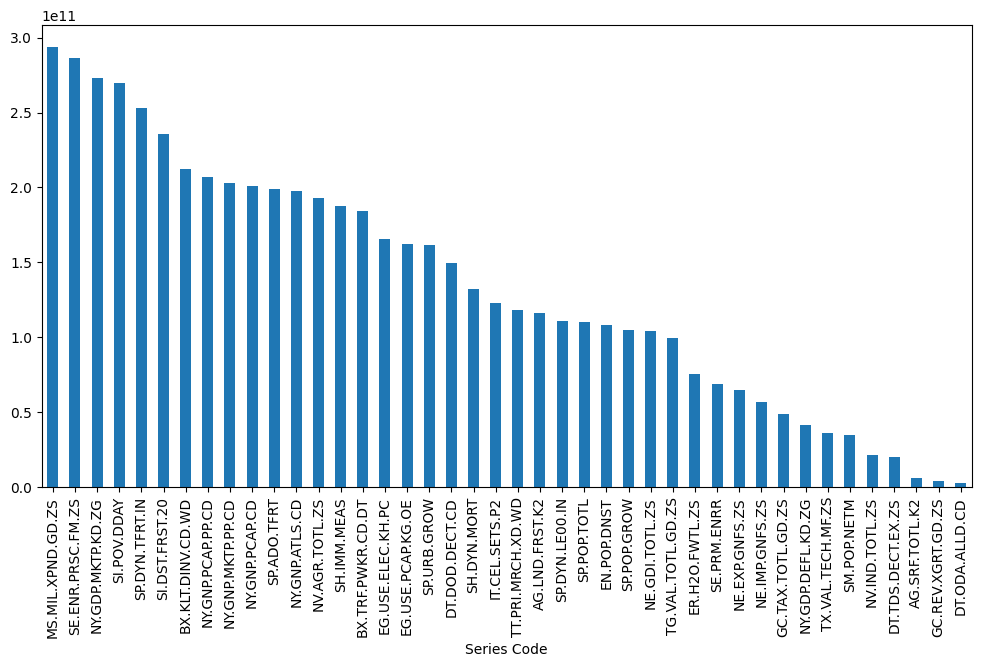

In [47]:
# Modeling using Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Checking which features are the most important
importance_ln_ch = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
abs(importance_ln_ch).sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))

In [48]:
# Predicting the GDP for the test set
y_pred_ln_ch = model.predict(X_test_scaled)
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse_ch = mean_squared_error(y_test, y_pred_ln_ch)
r2_ch = r2_score(y_test, y_pred_ln_ch)
print(f'Mean Squared Error for China: {mse_ch}')
print(f'R-squared for China: {r2_ch}')



Mean Squared Error for China: 2.58526255436536e+24
R-squared for China: 0.9190171509285397


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_e

<Axes: xlabel='Series Code'>

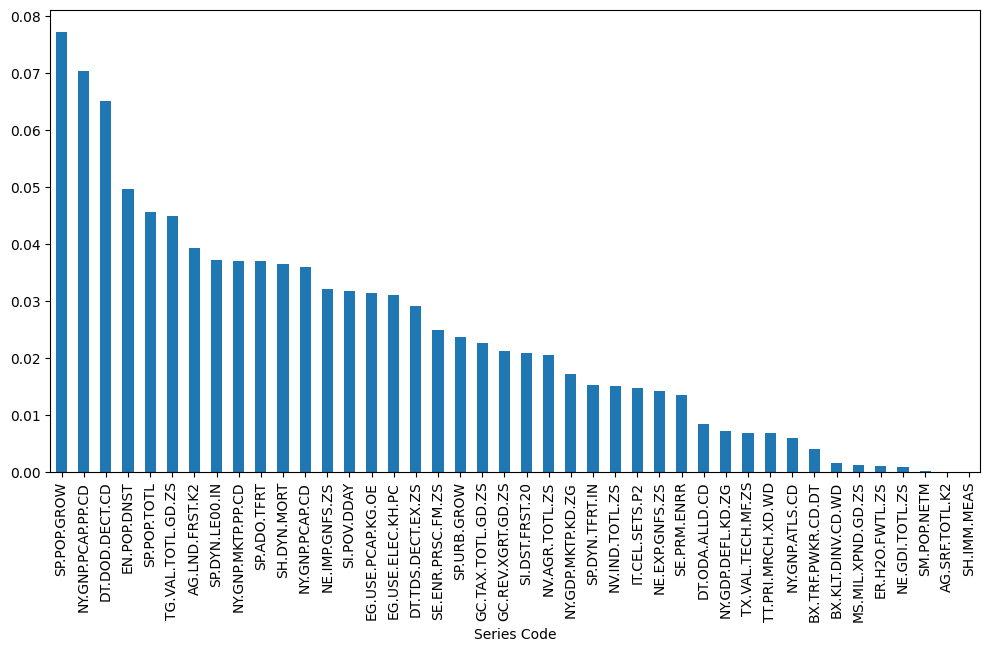

In [49]:
# Using Random forest and GridSearchCV to find the best parameters for the model
rf_model_ch = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search_ch = GridSearchCV(estimator=rf_model_ch, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_ch.fit(X_train_scaled, y_train)
# Checking the feature importances
importance_rf_ch = pd.Series(grid_search_ch.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Best Parameters for China:", grid_search_ch.best_params_)
importance_rf_ch.plot(kind='bar', figsize=(12, 6))


In [50]:
# Predicting using the Random Forest model
y_pred_rf_ch = grid_search_ch.predict(X_test_scaled)
# Evaluating the Random Forest model
mse_rf_ch = mean_squared_error(y_test, y_pred_rf_ch)
r2_rf_ch = r2_score(y_test, y_pred_rf_ch)
print(f'Random Forest Mean Squared Error for China: {mse_rf_ch}')
print(f'Random Forest R-squared for China: {r2_rf_ch}')


Random Forest Mean Squared Error for China: 2.830343162556043e+24
Random Forest R-squared for China: 0.9113400483186194


In [51]:
# Using XGBoost for better performance
from xgboost import XGBRegressor
xgb_model_ch = XGBRegressor(objective='reg:squarederror', random_state=42)
# Fitting the model
xgb_model_ch.fit(X_train_scaled, y_train)
# Predicting using the XGBoost model
y_pred_xgb_ch = xgb_model_ch.predict(X_test_scaled)
# Evaluating the XGBoost model
mse_xgb_ch = mean_squared_error(y_test, y_pred_xgb_ch)
r2_xgb_ch = r2_score(y_test, y_pred_xgb_ch)
print(f'XGBoost Mean Squared Error for China: {mse_xgb_ch}')
print(f'XGBoost R-squared for China: {r2_xgb_ch}')


XGBoost Mean Squared Error for China: 9.119179040746272e+23
XGBoost R-squared for China: 0.9714343481800181


<Axes: xlabel='Series Code'>

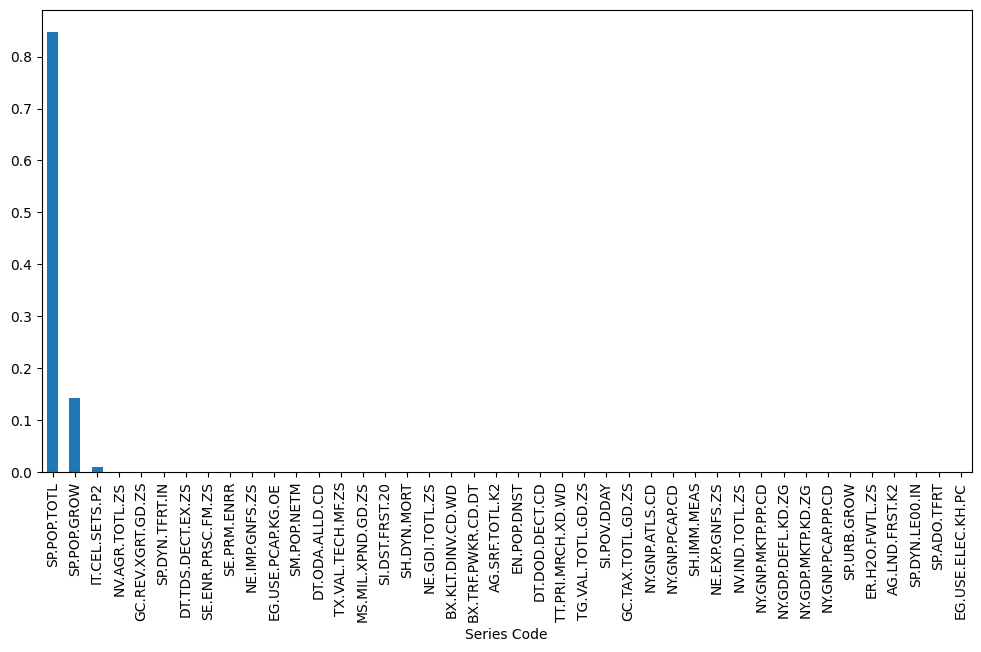

In [52]:
# plotting the importances of the features in the XGBoost model
importance_xgb_ch = pd.Series(xgb_model_ch.feature_importances_, index=X.columns).sort_values(ascending=False)
importance_xgb_ch.plot(kind='bar', figsize=(12, 6))
# Plotting the predictions vs actual values for the XGBoost model


# KENYA

In [53]:
# Transposing the dataframe to set the series code as the columns
df_kenya_t = df_kenya.set_index('Series Code').T
df_kenya_t.index.name = "Year"
df_kenya_t.sort_index(inplace=True)
# Checking the transposed dataframe
df_kenya_t.head()

Series Code,SP.POP.TOTL,SP.POP.GROW,AG.SRF.TOTL.K2,EN.POP.DNST,SI.POV.NAHC,SI.POV.DDAY,NY.GNP.ATLS.CD,NY.GNP.PCAP.CD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,...,IT.CEL.SETS.P2,TX.VAL.TECH.MF.ZS,TG.VAL.TOTL.GD.ZS,TT.PRI.MRCH.XD.WD,DT.DOD.DECT.CD,DT.TDS.DECT.EX.ZS,SM.POP.NETM,BX.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD,DT.ODA.ALLD.CD
Year,,,,,,,,,,,,,,,,,,,,,
1975,13511671.0,3.322833,580370.0,23.740505,NaN,NaN,3.418794e+09,250.0,NaN,NaN,...,0.0,NaN,47.586247,NaN,1.290220e+09,14.936685,-71421.0,1.320000e+07,1.715875e+07,1.248200e+08
1976,13957623.0,3.247198,580370.0,24.524059,NaN,NaN,3.512649e+09,250.0,NaN,NaN,...,0.0,NaN,50.625372,NaN,1.493325e+09,14.810465,-90990.0,9.900000e+06,4.637185e+07,1.546000e+08
1977,14428819.0,3.320172,580370.0,25.351968,NaN,NaN,4.108842e+09,280.0,NaN,NaN,...,0.0,NaN,55.068790,NaN,1.658887e+09,20.452076,-57493.0,1.848000e+07,5.654523e+07,1.607600e+08
1978,14934126.0,3.442140,580370.0,26.239811,NaN,NaN,4.926114e+09,330.0,NaN,NaN,...,0.0,NaN,51.548577,NaN,2.173728e+09,13.974577,-60718.0,2.640000e+07,3.441413e+07,2.456100e+08
1979,15460666.0,3.465019,580370.0,27.164961,NaN,NaN,6.214419e+09,400.0,NaN,NaN,...,0.0,NaN,43.725200,NaN,2.720995e+09,18.372145,-56280.0,1.914000e+07,8.400990e+07,3.483400e+08


In [54]:
# Dropping the rows that dont have any values in the TX.VAL.TECH.MF.ZS column
df_kenya_t = df_kenya_t.dropna(subset=['TX.VAL.TECH.MF.ZS'])
# Checking the transposed dataframe again
df_kenya_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2008 to 2023
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        13 non-null     float64
 1   SP.POP.GROW        13 non-null     float64
 2   AG.SRF.TOTL.K2     12 non-null     float64
 3   EN.POP.DNST        12 non-null     float64
 4   SI.POV.NAHC        2 non-null      float64
 5   SI.POV.DDAY        3 non-null      float64
 6   NY.GNP.ATLS.CD     13 non-null     float64
 7   NY.GNP.PCAP.CD     13 non-null     float64
 8   NY.GNP.MKTP.PP.CD  13 non-null     float64
 9   NY.GNP.PCAP.PP.CD  13 non-null     float64
 10  SI.DST.FRST.20     3 non-null      float64
 11  SP.DYN.LE00.IN     13 non-null     float64
 12  SP.DYN.TFRT.IN     13 non-null     float64
 13  SP.ADO.TFRT        13 non-null     float64
 14  SP.DYN.CONU.ZS     9 non-null      float64
 15  SH.STA.BRTC.ZS     2 non-null      float64
 16  SH.DYN.MORT        13 non-nu

In [55]:
# Removing columns with nulls more than 5
df_kenya_t = df_kenya_t.loc[:, df_kenya_t.isna().sum() < 5]
# Checking the transposed dataframe
df_kenya_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2008 to 2023
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        13 non-null     float64
 1   SP.POP.GROW        13 non-null     float64
 2   AG.SRF.TOTL.K2     12 non-null     float64
 3   EN.POP.DNST        12 non-null     float64
 4   NY.GNP.ATLS.CD     13 non-null     float64
 5   NY.GNP.PCAP.CD     13 non-null     float64
 6   NY.GNP.MKTP.PP.CD  13 non-null     float64
 7   NY.GNP.PCAP.PP.CD  13 non-null     float64
 8   SP.DYN.LE00.IN     13 non-null     float64
 9   SP.DYN.TFRT.IN     13 non-null     float64
 10  SP.ADO.TFRT        13 non-null     float64
 11  SP.DYN.CONU.ZS     9 non-null      float64
 12  SH.DYN.MORT        13 non-null     float64
 13  SH.IMM.MEAS        13 non-null     float64
 14  SH.DYN.AIDS.ZS     12 non-null     float64
 15  AG.LND.FRST.K2     12 non-null     float64
 16  ER.PTD.TOTL.ZS     10 non-nu

In [56]:
df_kenya_t

Series Code,SP.POP.TOTL,SP.POP.GROW,AG.SRF.TOTL.K2,EN.POP.DNST,NY.GNP.ATLS.CD,NY.GNP.PCAP.CD,NY.GNP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,...,IT.CEL.SETS.P2,TX.VAL.TECH.MF.ZS,TG.VAL.TOTL.GD.ZS,TT.PRI.MRCH.XD.WD,DT.DOD.DECT.CD,DT.TDS.DECT.EX.ZS,SM.POP.NETM,BX.TRF.PWKR.CD.DT,BX.KLT.DINV.CD.WD,DT.ODA.ALLD.CD
Year,,,,,,,,,,,,,,,,,,,,,
2008,39206351.0,3.029649,580370.0,68.887007,3.271032e+10,830.0,9.633885e+10,2460.0,59.955,4.660,...,41.604656,4.694389,44.933643,86.167512,7.691777e+09,4.886813,29612.0,6.673173e+08,9.558568e+07,1.249430e+09
2009,40408891.0,3.021109,580370.0,70.999914,3.342952e+10,830.0,8.750674e+10,2170.0,60.483,4.567,...,47.974299,6.062673,34.630374,96.779629,8.585721e+09,5.142973,7096.0,6.314609e+08,1.162576e+08,1.697680e+09
2010,41598567.0,2.901588,580370.0,73.090219,3.874513e+10,930.0,9.620268e+10,2310.0,60.915,4.446,...,60.140068,6.717619,38.017324,95.112452,8.885236e+09,4.406196,-21069.0,6.857573e+08,1.780646e+08,1.631260e+09
2013,44986791.0,2.472108,580370.0,79.043453,5.062493e+10,1130.0,1.234890e+11,2750.0,61.729,3.955,...,71.061220,4.069101,36.019914,87.652885,1.377550e+10,4.730759,-57634.0,1.304277e+09,1.118825e+09,3.306840e+09
2015,47088526.0,2.227033,580370.0,82.736279,6.209575e+10,1320.0,1.561005e+11,3320.0,62.279,3.766,...,80.501059,4.366095,31.373160,100.000000,1.978376e+10,8.330047,-95977.0,1.569268e+09,6.197245e+08,2.463560e+09
2016,48139687.0,2.207757,580370.0,84.583208,7.174826e+10,1490.0,1.860003e+11,3860.0,62.526,3.689,...,81.391495,7.586234,26.467903,99.721650,2.105767e+10,11.173638,-29728.0,1.744639e+09,4.695333e+08,2.188390e+09
2017,49197766.0,2.174129,580370.0,86.442292,7.569196e+10,1540.0,2.016007e+11,4100.0,62.725,3.609,...,87.470355,3.348590,27.346360,104.603303,2.695135e+10,14.597444,-68702.0,1.962273e+09,1.346085e+09,2.480220e+09
2018,50207107.0,2.030837,580370.0,88.215741,8.658904e+10,1720.0,2.181510e+11,4350.0,62.825,3.536,...,99.095407,3.612963,25.411326,98.367940,3.143380e+10,23.699506,-115436.0,2.720366e+09,7.677615e+08,2.491010e+09
2019,51202827.0,1.963815,580370.0,89.965258,9.615446e+10,1880.0,2.361699e+11,4610.0,62.939,3.433,...,107.073493,4.593278,23.405425,99.098563,3.497010e+10,38.427302,-61949.0,2.838192e+09,4.699403e+08,3.171920e+09


In [57]:
# Using the initiated imputer to fill the null values in the transposed dataframe
df_kenya_t_imputed = pd.DataFrame(imputer.fit_transform(df_kenya_t), columns=df_kenya_t.columns, index=df_kenya_t.index)
# Checking the imputed dataframe
df_kenya_t_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2008 to 2023
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SP.POP.TOTL        13 non-null     float64
 1   SP.POP.GROW        13 non-null     float64
 2   AG.SRF.TOTL.K2     13 non-null     float64
 3   EN.POP.DNST        13 non-null     float64
 4   NY.GNP.ATLS.CD     13 non-null     float64
 5   NY.GNP.PCAP.CD     13 non-null     float64
 6   NY.GNP.MKTP.PP.CD  13 non-null     float64
 7   NY.GNP.PCAP.PP.CD  13 non-null     float64
 8   SP.DYN.LE00.IN     13 non-null     float64
 9   SP.DYN.TFRT.IN     13 non-null     float64
 10  SP.ADO.TFRT        13 non-null     float64
 11  SP.DYN.CONU.ZS     13 non-null     float64
 12  SH.DYN.MORT        13 non-null     float64
 13  SH.IMM.MEAS        13 non-null     float64
 14  SH.DYN.AIDS.ZS     13 non-null     float64
 15  AG.LND.FRST.K2     13 non-null     float64
 16  ER.PTD.TOTL.ZS     13 non-nu

In [58]:
# Dropping the GDP column as a feature for the model
y = df_kenya_t_imputed['NY.GDP.MKTP.CD']
X = df_kenya_t_imputed.drop(columns=['NY.GDP.MKTP.CD'])
X.shape, y.shape

((13, 41), (13,))

In [59]:
# Train-test split and scaling the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: xlabel='Series Code'>

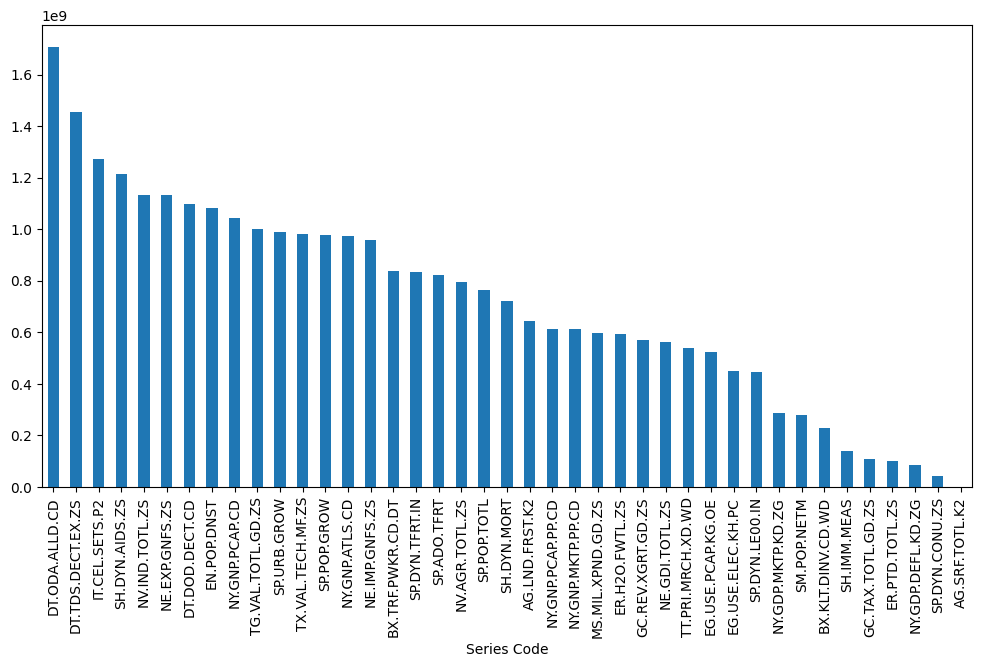

In [60]:
# Modeling using Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Checking which features are the most important
importance_ln_ke = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
abs(importance_ln_ke).sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))

In [61]:
# Predicting the GDP for the test set
y_pred_ln_ke = model.predict(X_test_scaled)
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse_ke = mean_squared_error(y_test, y_pred_ln_ke)
r2_ke = r2_score(y_test, y_pred_ln_ke)
print(f'Mean Squared Error for Kenya: {mse_ke}')
print(f'R-squared for Kenya: {r2_ke}')


Mean Squared Error for Kenya: 3.5952698891319628e+19
R-squared for Kenya: 0.9693441845621789


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_e

<Axes: xlabel='Series Code'>

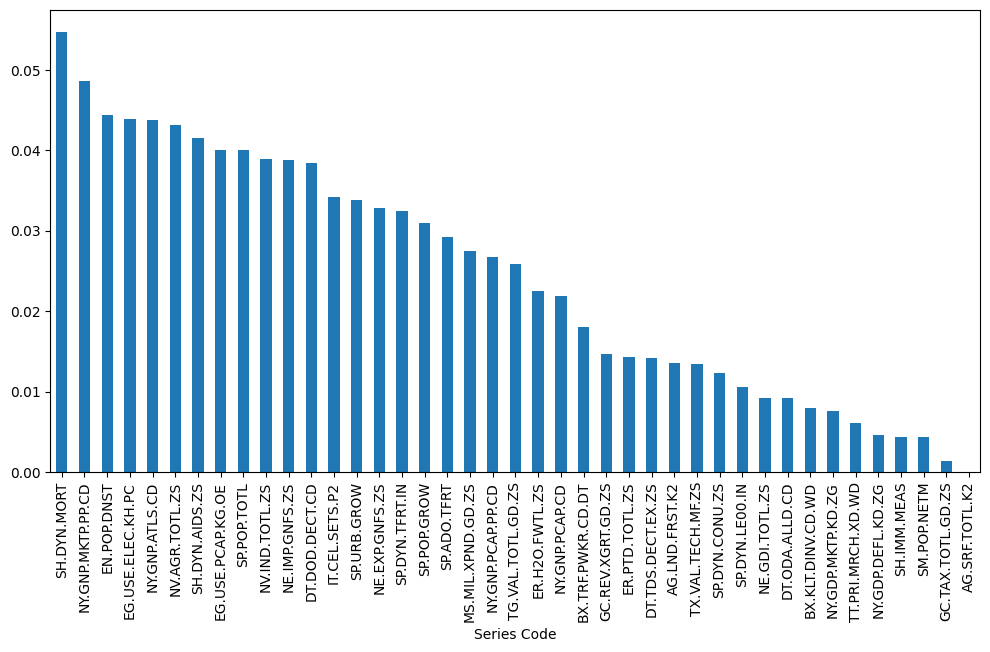

In [62]:
# Using Ransom forest and GridSearchCV to find the best parameters for the model
rf_model_ke = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search_ke = GridSearchCV(estimator=rf_model_ke, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_ke.fit(X_train_scaled, y_train)
# Checking the feature importances
importance_rf_ke = pd.Series(grid_search_ke.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Best Parameters for Kenya:", grid_search_ke.best_params_)
importance_rf_ke.plot(kind='bar', figsize=(12, 6))


In [63]:
# Predicting using the Random Forest model
y_pred_rf_ke = grid_search_ke.predict(X_test_scaled)
# Evaluating the Random Forest model
mse_rf_ke = mean_squared_error(y_test, y_pred_rf_ke)
r2_rf_ke = r2_score(y_test, y_pred_rf_ke)
print(f'Random Forest Mean Squared Error for Kenya: {mse_rf_ke}')
print(f'Random Forest R-squared for Kenya: {r2_rf_ke}')


Random Forest Mean Squared Error for Kenya: 1.1285585015839524e+20
Random Forest R-squared for Kenya: 0.9037711153760012


In [64]:
# Using XGBoost for better performance
from xgboost import XGBRegressor
xgb_model_ke = XGBRegressor(objective='reg:squarederror', random_state=42)
# Fitting the model
xgb_model_ke.fit(X_train_scaled, y_train)
# Predicting using the XGBoost model
y_pred_xgb_ke = xgb_model_ke.predict(X_test_scaled)
# Evaluating the XGBoost model
mse_xgb_ke = mean_squared_error(y_test, y_pred_xgb_ke)
r2_xgb_ke = r2_score(y_test, y_pred_xgb_ke)
print(f'XGBoost Mean Squared Error for Kenya: {mse_xgb_ke}')
print(f'XGBoost R-squared for Kenya: {r2_xgb_ke}')


XGBoost Mean Squared Error for Kenya: 2.161029243755907e+19
XGBoost R-squared for Kenya: 0.9815735353130025


<Axes: xlabel='Series Code'>

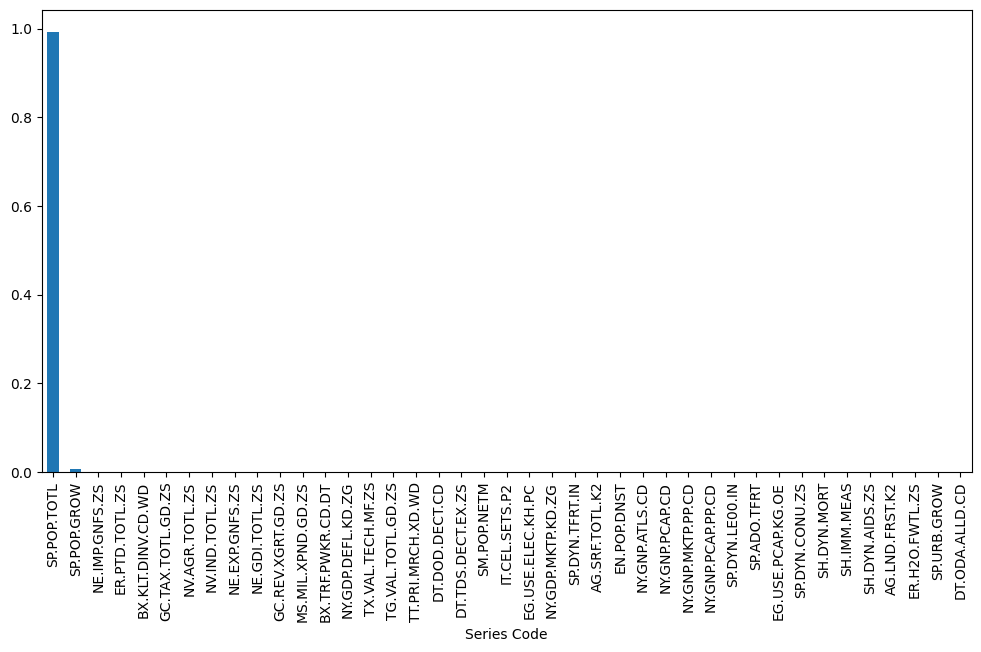

In [65]:
# feature importances of the XGBoost model
importance_xgb_ke = pd.Series(xgb_model_ke.feature_importances_, index=X.columns).sort_values(ascending=False)
importance_xgb_ke.plot(kind='bar', figsize=(12, 6))

In [66]:
# Creating a dataframe of all the feature importances from the three models
def series_to_df(series, country, model):
    return pd.DataFrame({
        'Country': country,
        'Model': model,
        'Indicator': series.index,
        'Importance': series.values
    })

# Combine all into one DataFrame
df_all = pd.concat([
    series_to_df(importance_rf_ke, 'Kenya', 'RandomForest'),
    series_to_df(importance_ln_ke, 'Kenya', 'Linear'),
    series_to_df(importance_xgb_ke, 'Kenya', 'XGBoost'),

    series_to_df(importance_rf_ch, 'China', 'RandomForest'),
    series_to_df(importance_ln_ch, 'China', 'Linear'),
    series_to_df(importance_xgb_ch, 'China', 'XGBoost'),

    series_to_df(importance_rf_sgp, 'Singapore', 'RandomForest'),
    series_to_df(importance_ln_sgp, 'Singapore', 'Linear'),
    series_to_df(importance_xgb_sgp, 'Singapore', 'XGBoost'),
], ignore_index=True)

print(df_all.head())

  Country         Model          Indicator  Importance
0   Kenya  RandomForest        SH.DYN.MORT    0.054738
1   Kenya  RandomForest  NY.GNP.MKTP.PP.CD    0.048644
2   Kenya  RandomForest        EN.POP.DNST    0.044432
3   Kenya  RandomForest  EG.USE.ELEC.KH.PC    0.043867
4   Kenya  RandomForest     NY.GNP.ATLS.CD    0.043825


In [67]:
df_all

,Country,Model,Indicator,Importance
0,Kenya,RandomForest,SH.DYN.MORT,0.054738
1,Kenya,RandomForest,NY.GNP.MKTP.PP.CD,0.048644
2,Kenya,RandomForest,EN.POP.DNST,0.044432
3,Kenya,RandomForest,EG.USE.ELEC.KH.PC,0.043867
4,Kenya,RandomForest,NY.GNP.ATLS.CD,0.043825
...,...,...,...,...
358,Singapore,XGBoost,SP.ADO.TFRT,0.000000
359,Singapore,XGBoost,SP.DYN.LE00.IN,0.000000
360,Singapore,XGBoost,NY.GNP.PCAP.PP.CD,0.000000
361,Singapore,XGBoost,NY.GNP.MKTP.PP.CD,0.000000


In [68]:
# Melting the dataframe to have the countries as columns and Feature and model as the index
df_melted = df_all.melt(id_vars=['Model', 'Indicator', 'Country'], value_vars=['Importance', 'Country'], value_name='Importance_Value')
df_melted

,Model,Indicator,Country,variable,Importance_Value
0,RandomForest,SH.DYN.MORT,Kenya,Importance,0.054738
1,RandomForest,NY.GNP.MKTP.PP.CD,Kenya,Importance,0.048644
2,RandomForest,EN.POP.DNST,Kenya,Importance,0.044432
3,RandomForest,EG.USE.ELEC.KH.PC,Kenya,Importance,0.043867
4,RandomForest,NY.GNP.ATLS.CD,Kenya,Importance,0.043825
...,...,...,...,...,...
358,XGBoost,SP.ADO.TFRT,Singapore,Importance,0.000000
359,XGBoost,SP.DYN.LE00.IN,Singapore,Importance,0.000000
360,XGBoost,NY.GNP.PCAP.PP.CD,Singapore,Importance,0.000000
361,XGBoost,NY.GNP.MKTP.PP.CD,Singapore,Importance,0.000000


In [69]:
# Pivot the dataframe to have the countries as columns and the features as the index
df_pivoted = df_melted.pivot_table(index=['Indicator', 'Model'], columns='Country', values='Importance_Value').reset_index()
df_pivoted.columns.name = None 
df_pivoted

,Indicator,Model,China,Kenya,Singapore
0,AG.LND.FRST.K2,Linear,1.163845e+11,6.446707e+08,-3.063787e+09
1,AG.LND.FRST.K2,RandomForest,3.935918e-02,1.356698e-02,3.113550e-02
2,AG.LND.FRST.K2,XGBoost,0.000000e+00,0.000000e+00,0.000000e+00
3,AG.SRF.TOTL.K2,Linear,5.728104e+09,1.192093e-07,2.238179e+09
4,AG.SRF.TOTL.K2,RandomForest,1.732158e-06,0.000000e+00,3.123907e-02
...,...,...,...,...,...
136,TT.PRI.MRCH.XD.WD,RandomForest,6.762640e-03,6.042226e-03,1.024353e-03
137,TT.PRI.MRCH.XD.WD,XGBoost,0.000000e+00,0.000000e+00,0.000000e+00
138,TX.VAL.TECH.MF.ZS,Linear,-3.621442e+10,-9.803807e+08,-2.952990e+09
139,TX.VAL.TECH.MF.ZS,RandomForest,6.766134e-03,1.339583e-02,1.553046e-02


In [70]:
# Checking with the key features are the most important for China using the best performing model.
df_pivoted_china_10 = df_pivoted[df_pivoted['Model'] == 'XGBoost'].sort_values(by='China', ascending=False).reset_index(drop=True).head(10)
df_pivoted_china_10

,Indicator,Model,China,Kenya,Singapore
0,SP.POP.TOTL,XGBoost,8.475515e-01,9.926955e-01,2.860819e-03
1,SP.POP.GROW,XGBoost,1.426041e-01,7.304464e-03,1.077691e-03
2,IT.CEL.SETS.P2,XGBoost,9.815201e-03,0.000000e+00,0.000000e+00
3,NV.AGR.TOTL.ZS,XGBoost,2.121321e-05,0.000000e+00,0.000000e+00
4,GC.REV.XGRT.GD.ZS,XGBoost,7.822257e-06,0.000000e+00,0.000000e+00
5,SP.DYN.TFRT.IN,XGBoost,1.423559e-07,0.000000e+00,1.432937e-15
6,DT.TDS.DECT.EX.ZS,XGBoost,8.289101e-08,0.000000e+00,NaN
7,SE.ENR.PRSC.FM.ZS,XGBoost,2.918482e-08,NaN,NaN
8,SE.PRM.ENRR,XGBoost,5.234524e-09,NaN,0.000000e+00
9,NE.IMP.GNFS.ZS,XGBoost,1.896126e-10,6.207875e-13,0.000000e+00


In [71]:
# Checking with the key features are the most important for Singapore using the best performing model.
df_pivoted_sgp_10 = df_pivoted[df_pivoted['Model'] == 'Linear'].sort_values(by='Singapore', ascending=False).reset_index(drop=True).head(10)
df_pivoted_sgp_10

,Indicator,Model,China,Kenya,Singapore
0,NY.GNP.PCAP.CD,Linear,2.009450e+11,1.044705e+09,8.696517e+09
1,NY.GNP.PCAP.PP.CD,Linear,2.068138e+11,6.140700e+08,8.574436e+09
2,NY.GNP.MKTP.PP.CD,Linear,2.028322e+11,6.121515e+08,7.872493e+09
3,NY.GNP.ATLS.CD,Linear,1.976994e+11,9.735130e+08,7.763361e+09
4,SM.POP.NETM,Linear,3.492834e+10,-2.797267e+08,6.890077e+09
5,BX.KLT.DINV.CD.WD,Linear,2.125048e+11,-2.290448e+08,6.143034e+09
6,GC.TAX.TOTL.GD.ZS,Linear,-4.842270e+10,-1.095802e+08,5.517020e+09
7,SH.IMM.MEAS,Linear,-1.876150e+11,-1.409395e+08,5.259533e+09
8,NY.GDP.DEFL.KD.ZG,Linear,-4.141429e+10,-8.565227e+07,4.896221e+09
9,EG.USE.ELEC.KH.PC,Linear,1.655292e+11,4.480340e+08,4.729898e+09


In [72]:
# Checking with the key features are the most important for Kenya using the best performing model.
df_pivoted_ke_10 = df_pivoted[df_pivoted['Model'] == 'Linear'].sort_values(by='Kenya', ascending=False).reset_index(drop=True).head(10)
df_pivoted_ke_10

,Indicator,Model,China,Kenya,Singapore
0,DT.ODA.ALLD.CD,Linear,2.693220e+09,1.706833e+09,NaN
1,DT.TDS.DECT.EX.ZS,Linear,2.034513e+10,1.453509e+09,NaN
2,IT.CEL.SETS.P2,Linear,1.231878e+11,1.271259e+09,4.507788e+09
3,DT.DOD.DECT.CD,Linear,1.497724e+11,1.098512e+09,NaN
4,EN.POP.DNST,Linear,1.079946e+11,1.082698e+09,-6.753948e+08
5,NY.GNP.PCAP.CD,Linear,2.009450e+11,1.044705e+09,8.696517e+09
6,NY.GNP.ATLS.CD,Linear,1.976994e+11,9.735130e+08,7.763361e+09
7,BX.TRF.PWKR.CD.DT,Linear,1.842405e+11,8.375600e+08,0.000000e+00
8,NV.AGR.TOTL.ZS,Linear,-1.930580e+11,7.969974e+08,-4.085748e+09
9,SP.POP.TOTL,Linear,1.101824e+11,7.634795e+08,2.641236e+09


The Kenya Innovation MasterPlan has mentioned 5 pillars that we will use to analyze the importances.

These pillars are:
- Human Capital
- Access to Financing
- Access to Markets
- Infrastructure
- Policies

These are represented in this study by their position on feature importance rank:

| Indicator Name                                         | Indicator Code       | China | Sinagapore | Kenya |
| --------                                               | -------              |------ |--------    | ----- |
| GNI per capita, PPP (current international $)          | NY.GNP.PCAP.PP.CD    | 18    | 2          | 12    |
| Gross capital formation (% of GDP)                     | NE.GDI.TOTL.ZS       | 33    | 28         | 15    |
| Electric power consumption (kWh per capita)            | EG.USE.ELEC.KH.PC    | 38    | 10         | 17    |
| Mobile cellular subscriptions (per 100 people)         | IT.CEL.SETS.P2       | 11    | 3          | 3     |
| High-technology exports (% of manufactured exports)    | TX.VAL.TECH.MF.ZS    | 14    | 31         | 36    |
 
